In [1]:
import ROOT
import numpy as np
from ROOT import TCanvas, TH1F, TROOT, TFile, TCanvas, TLine

Welcome to JupyROOT 6.16/00


In [2]:
#%jsroot on # for JavaScript ROOT activation
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)

Reading the output from Nuwro.

In [3]:
f = ROOT.TFile("input/ccqedunefinal.root")

Warning in <TClass::Init>: no dictionary for class event is available
Warning in <TClass::Init>: no dictionary for class flags is available
Warning in <TClass::Init>: no dictionary for class params is available
Warning in <TClass::Init>: no dictionary for class line is available
Warning in <TClass::Init>: no dictionary for class vec is available
Warning in <TClass::Init>: no dictionary for class particle is available
Warning in <TClass::Init>: no dictionary for class vect is available


## The cross section(s) is(are):

In [4]:
g=f.xsections

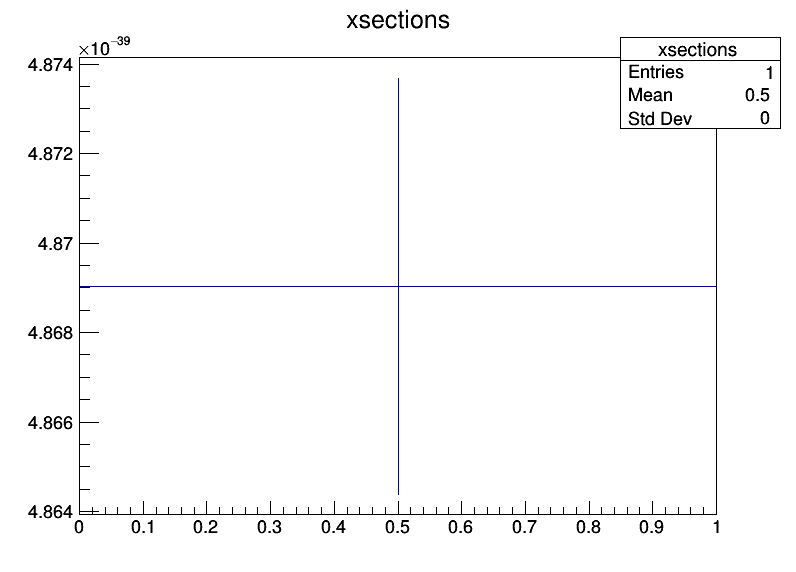

In [5]:
g.Draw()
c.Draw()

The events after the interaction in the ND reads

In [6]:
#tree = f.Get("treeout;4")

In [7]:
f=TFile("input/ccqedunefinal.root")
tree=f.Get("treeout;3")
tree.Draw("out.t","","goff")
#arr=tree.GetV1()

155658L

### Enery of the outgoing leptop 

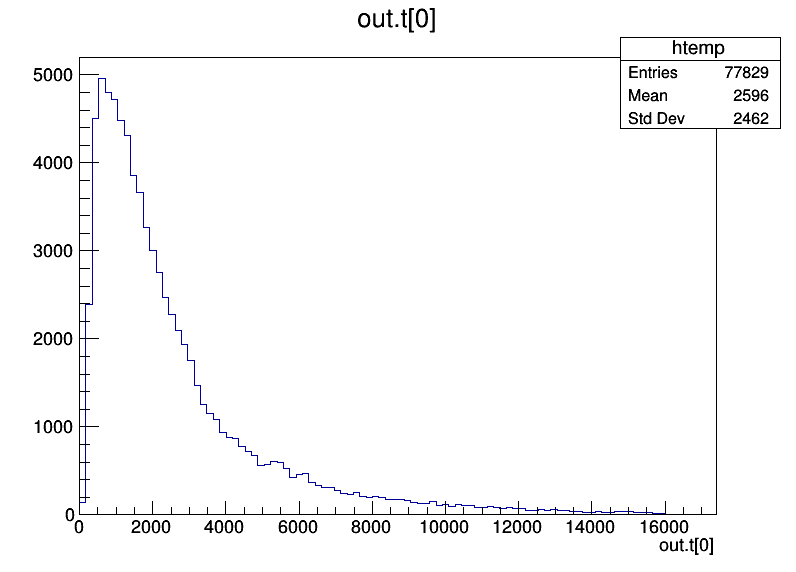

In [8]:
tree.Draw("out.t[0]")
c.Draw()

### Energy of the outgoing proton

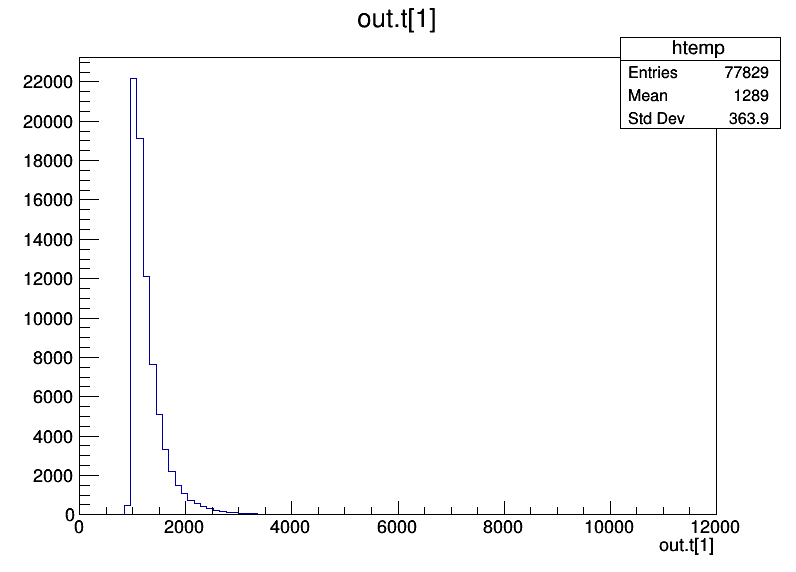

In [9]:
tree.Draw("out.t[1]")
c.Draw()

### $P_z$ of outgoing lepton 

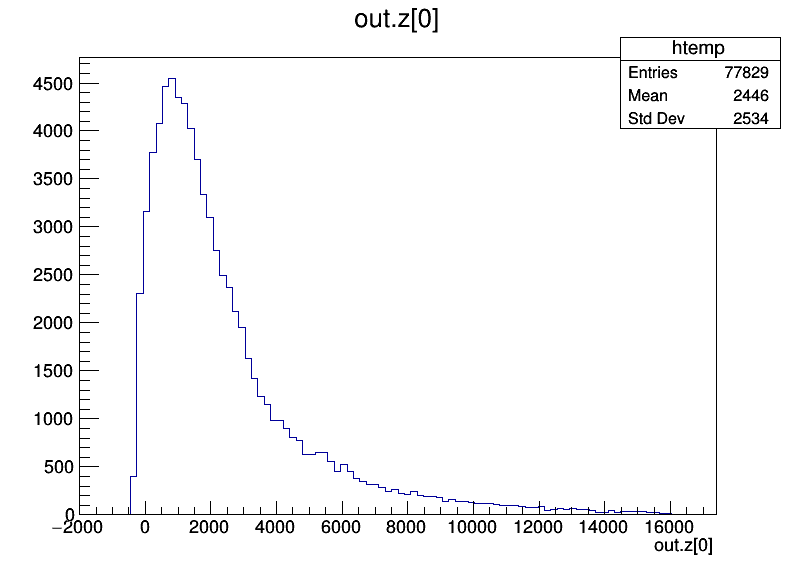

In [10]:
tree.Draw("out.z[0]")
c.Draw()

## Funtion definition for a cut analysis

In [11]:
def cut(px,py,pz,e,m):
    '''
    input:
    e  --> Energy
    px --> px momentum
    py --> py momentum
    pz --> pz momentum
    m  --> mass
    out:
    alpha --> flag, if true keep going
    f --> e*thetha**2
    theta --> angle between outgoing electron  and z direction
    '''
    
    delta=1e-4
    p=np.sqrt(px**2+py**2+pz**2)
    e1=np.sqrt(px**2+py**2+pz**2-m**2)
    if np.abs(np.abs(e)-np.abs(e1))>delta:
        print ("Something wrong, please check")
        alpha = False
        theta = -1
        f = -1
    if np.abs(np.abs(e)-np.abs(e1))<delta:  
        alpha = True
        theta=np.arccos(pz/p)
        f=e*theta**2
    return alpha,f,theta

In [12]:
cut(6,7,8,1,3)

Something wrong, please check


(False, -1, -1)

### Histogram of something line$\dfrac{p_{z}^2}{p^2}$ 

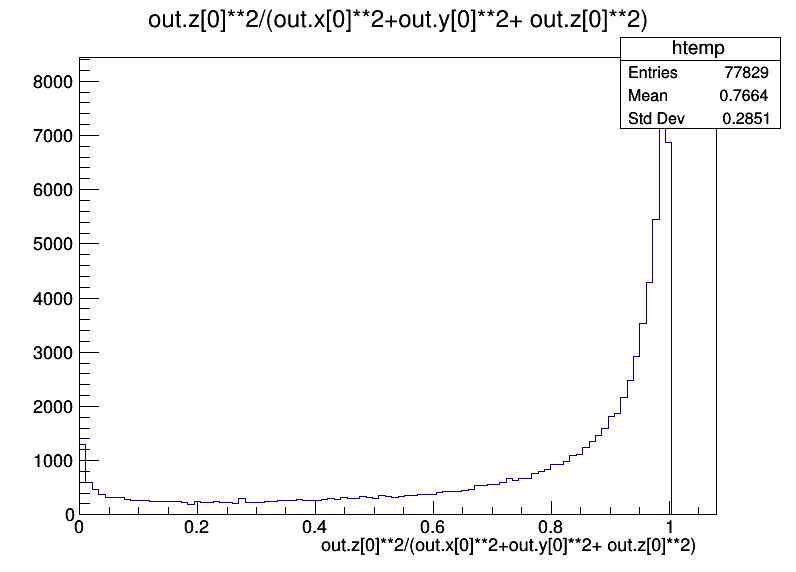

In [13]:
tree.Draw("out.z[0]**2/(out.x[0]**2+out.y[0]**2+ out.z[0]**2)")
c.Draw()

### Energy of the incoming $\nu_{\mu}$ neutrino 

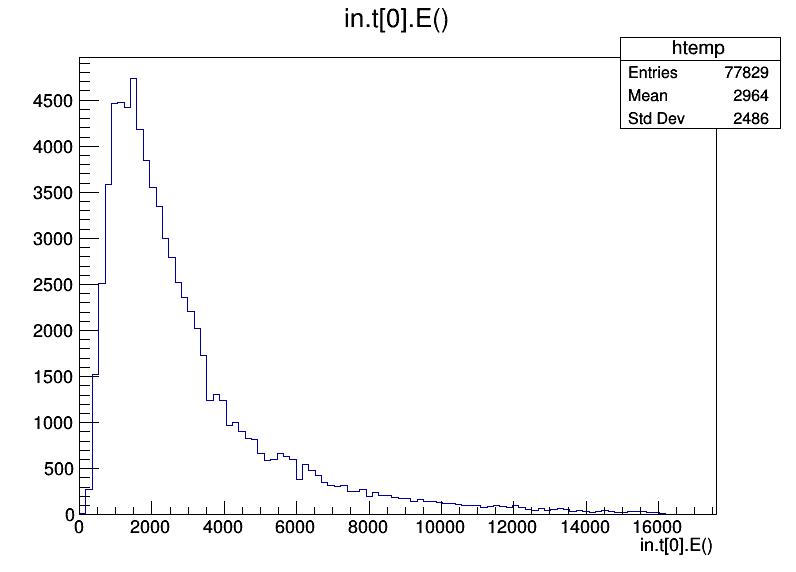

In [14]:
tree.Draw("in.t[0].E()")
c.Draw()

### Primary nucleon kinetic energy 

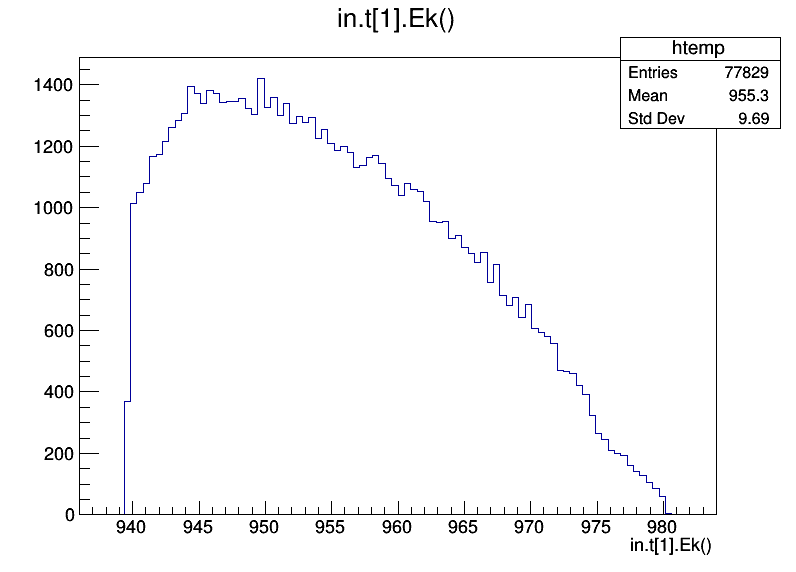

In [15]:
tree.Draw("in.t[1].Ek()")
c.Draw()

## Listing all the content of the root file 

In [18]:
f.ls()

TFile**		input/ccqedunefinal.root	
 TFile*		input/ccqedunefinal.root	
  OBJ: TTree	treeout	Tree of events : 0 at: 0x58516a0
  KEY: TNamed	NuWro version;1	nuwro_19.02.2-26-g3b63c69
  KEY: TTree	treeout;4	Tree of events
  KEY: TTree	treeout;3	Tree of events
  KEY: TH1D	xsections;1	xsections


## Reading the root file

In [19]:
import ROOT
from ROOT import TCanvas, TH1F, TROOT, TFile, TCanvas
#ROOT.gSystem.Load("/home/gapalaci/HEP_tools/Delphes-3.4.2/libDelphes")
directory = str("input/ccqedunefinal.root")
File = ROOT.TChain("treeout;4/out")
File.Add(directory)


1

In [20]:
# Total number of simmulated events 
Number = File.GetEntries() 
print (Number)

100000


### Showing the content for event N of the tree called "treeout;4"

In [21]:
N=1
File.Show(N)

======> EVENT:1
 e               = (event*)0x6cf13f0
 fUniqueID       = 0
 fBits           = 50331648
 flag.qel        = 1
 flag.res        = 0
 flag.dis        = 0
 flag.coh        = 0
 flag.mec        = 0
 flag.hip        = 0
 flag.nc         = 0
 flag.cc         = 1
 flag.anty       = 0
 flag.res_delta  = 1
 par.random_seed = 0
 par.number_of_events = 100000
 par.number_of_test_events = 1000000
 par.save_test_events = 0
 par.user_events = 0
 par.user_params.string = 
 par.beam_type   = 0
 par.beam_energy.string =  125 16125 1.285818052e-06 2.702199684e-06  3.605214428e-06 4.503745832e-06 4.189763528e-06 4.616862932e-06 3.981023064e-06 3.676394832e-06 3.251146776e-06 2.937538112e-06 2.5610494104e-06 2.3434372832e-06 2.0857618216e-06  1.7830235584e-06 1.3552357892e-06 1.3748428516e-06 1.0400214188e-06 1.0346067064e-06 8.63007826e-07 8.766609844e-07 6.640541244e-07 6.4894709e-07 7.179487824e-07 6.05291188e-07 4.329705484e-07 5.72058342e-07 4.767585808e-07 3.586019564e-07 3.274700768e-0

## Correct way of extracting information 

In [24]:
for i in range(Number):
    Entry = File.GetEntry(i)
    EntryFromBranch = 1# File.GetLeaf("out").Entries()
    for j in range(EntryFromBranch):
        e_out_electron = File.GetLeaf("out.t").GetValue(0) #Energy of the outgoing electron
        e_out_proton = File.GetLeaf("out.t").GetValue(1) #Energy of the outgoing proton
        print e_out_electron, e_out_proton, i

2118.27770249 999.734632933 0
2097.75736963 1159.85530568 1
3035.21152644 1081.72154442 2
2136.32680233 995.390851091 3
1801.12554251 1257.88961326 4
1863.09583176 1101.5883009 5
391.581088302 995.314624957 6
4268.97773265 1259.59331505 7
664.545003809 1948.9233902 8
4421.69607137 1180.02147272 9
1725.02251367 1165.53664175 10
4602.89654206 1014.69749038 11
1939.93384359 1114.00484119 12
1325.40802065 1243.07167771 13
555.907895216 1132.24683898 14
807.071787879 1045.44988459 15
380.792849919 1233.28120638 16
2659.62950334 1393.2558941 17
2115.0065075 1100.96484263 18
7469.56513953 1194.06254777 19
6065.42397558 1399.92813212 20
1705.28532345 973.816372809 21
2925.99800173 1486.80484806 22
1910.30744624 1307.45949981 23
1832.66724773 979.489548726 24
3964.5099328 986.227676264 25
2461.64047351 1038.41941772 26
492.377039254 1318.36122356 27
1389.87089747 2140.38917076 28
2576.48459658 1611.77356519 29
250.608126886 1151.73751797 30
3125.15694225 1026.40497281 31
6398.26197603 1231.3631

10716.2299532 1630.39963613 1288
1487.25937655 1039.44739752 1289
881.189029995 1028.33783415 1290
3457.79721558 1131.19620333 1291
419.472045178 1162.08740806 1292
3043.67631478 1647.76015318 1293
1132.04465005 1104.39577863 1294
1214.95489316 1216.57643127 1295
3533.26888228 1099.07106482 1296
1203.2890059 1166.66076038 1297
1007.2704018 1649.42267745 1298
3430.42205132 1359.58927494 1299
9576.33225529 1451.56164607 1300
862.961218388 1344.200799 1301
1866.30459917 955.265367971 1302
4495.64967427 1040.60360905 1303
440.70133266 1444.03216876 1304
1241.12247394 1713.97383576 1305
993.960813864 1083.09300644 1306
229.666928665 1358.2886685 1307
535.636806342 1704.81890625 1308
2564.52354393 1006.87853756 1309
1569.04202238 1113.54458222 1310
946.918217775 1723.99730428 1311
1459.74202377 1249.85231555 1312
360.169899916 1023.35445553 1313
1052.98719948 1255.99845931 1314
3401.2276394 988.862941006 1315
8463.92963363 1307.07413241 1316
4398.45465852 1020.02560041 1317
5773.32295513 186

302.189257381 1138.86926749 2385
156.106304643 1066.0868027 2386
2298.03084404 1553.13661473 2387
1424.51893285 1013.2341837 2388
1337.37052597 1281.47873512 2389
5438.96425367 1069.55475758 2390
3214.40396871 1019.24370777 2391
388.63312067 1054.35788152 2392
1460.98175944 940.776409794 2393
898.910391367 1464.05615225 2394
2133.48028524 1435.12371821 2395
5692.4382623 1565.88448944 2396
3161.67578836 1184.73567519 2397
4140.84990551 1272.49300247 2398
2007.60353495 1208.71908978 2399
1825.77753745 1675.14894392 2400
388.350057267 1212.53055805 2401
1083.23865179 1613.58609883 2402
3364.35611271 1017.33032154 2403
1803.97114478 1061.14615987 2404
15498.2956813 1126.89137788 2405
1922.93960963 1496.82295149 2406
1354.77853038 1096.01676835 2407
4606.40006644 1037.19840955 2408
3174.79510434 1066.00069692 2409
1344.47130242 1149.76033601 2410
2235.04657526 1049.60340596 2411
443.808228098 1081.65659332 2412
1014.19929545 1019.37425844 2413
1330.84240914 2986.13981423 2414
409.667795086 

988.921700798 1216.00866091 3468
7275.23393711 1670.37535435 3469
483.615197595 1355.09612031 3470
947.909734182 1429.69569864 3471
3576.12877808 1164.50062889 3472
2525.72116867 1667.15637607 3473
2435.39797296 1206.3493533 3474
1988.00234602 1309.37433773 3475
823.385298375 1042.7592385 3476
2719.30508474 1867.39051907 3477
426.20722074 1113.26043252 3478
2229.33885163 1222.23092663 3479
1437.58894632 1255.05425217 3480
992.167552687 1046.07935869 3481
2607.93001839 1529.96609694 3482
1050.02380917 1026.40634603 3483
905.933934442 1158.77564109 3484
496.044067065 1241.63404488 3485
2698.74860532 977.722835883 3486
1748.27900875 1058.59750219 3487
2668.85064557 1349.17049034 3488
15963.3534757 1053.63460436 3489
3292.08159475 1744.60085296 3490
884.429704656 973.756091231 3491
6005.17389855 1236.68306832 3492
3079.19306882 1039.24274764 3493
2415.72578048 1207.83392894 3494
2278.75160848 1807.18265368 3495
1319.04942544 1205.89313908 3496
12966.6477046 1618.52688738 3497
340.296394011

712.264893351 962.810757826 4651
1843.61355941 961.492587595 4652
830.716718378 1780.87763251 4653
2960.57727608 1103.87707158 4654
2089.36241959 1176.94352197 4655
955.618932057 1247.78729489 4656
3586.99189112 1158.12400375 4657
4854.96138945 1975.54897543 4658
1364.04789996 1141.77214971 4659
2650.39308578 1193.34705193 4660
3446.37585314 1076.74005504 4661
6902.68519404 1918.41778852 4662
1945.4670076 1654.50706864 4663
1417.20294609 1191.34554176 4664
703.587350504 1080.15136258 4665
480.236890392 1106.63048698 4666
8671.18936559 1359.47864309 4667
1655.8028883 1348.86573586 4668
998.302396749 1275.05565729 4669
4013.64998503 1150.78575234 4670
1310.04066653 1673.30719297 4671
291.799757316 1203.61169119 4672
487.427309924 2540.58495408 4673
1472.57857947 1507.75675373 4674
1125.2398141 1283.7070307 4675
1695.06054763 1852.13231573 4676
2833.28510736 1157.56465883 4677
1048.42456049 1591.66989836 4678
8584.94090497 1165.91940638 4679
1478.41305146 1179.00798939 4680
1399.22617134 

2892.93278975 1078.82571163 5915
1910.07286518 1034.94171539 5916
530.42568483 1101.45861773 5917
879.729200701 982.620369866 5918
1618.30251278 1386.39430477 5919
5821.02280206 982.491319611 5920
4768.63242297 1211.08854626 5921
2676.27672322 1464.75724612 5922
2425.69729129 1351.26679694 5923
3859.323801 1043.98446534 5924
342.705057293 1080.20225057 5925
3671.48176827 1604.7798879 5926
5058.53197353 1451.68261224 5927
955.875938495 1089.4287127 5928
970.608917622 1094.64528458 5929
2335.42612273 1573.38929951 5930
1480.03641893 1452.80634894 5931
461.088168575 1509.71912718 5932
3288.40635669 1290.94980617 5933
10116.2279182 1673.48026907 5934
1213.23438644 1647.3988212 5935
1340.3254619 957.672999985 5936
2850.16872096 1438.69974132 5937
1607.86318741 1984.28167457 5938
4309.32736206 1019.02561495 5939
372.557354323 1206.97519668 5940
1089.08716503 1422.24404318 5941
497.245110438 1512.5122895 5942
1915.98911739 1111.79692669 5943
321.433909483 1021.58201132 5944
9989.94519823 1596

2347.57862124 1732.32802709 7039
1878.52749989 1071.26160041 7040
3479.89738077 1163.90000576 7041
649.895973298 986.674765431 7042
499.391913577 1385.37157429 7043
2271.41347834 1296.17764188 7044
4359.81111876 1230.29915426 7045
709.03817753 1164.57272491 7046
1267.51223313 1183.57774389 7047
2264.8033169 1008.96539106 7048
1699.6308516 1052.45437623 7049
787.480417566 1005.68133572 7050
1079.93183929 1054.66140072 7051
4079.02166495 1035.74660514 7052
1464.19631863 1115.25771463 7053
2736.25733012 1027.94084638 7054
437.87437033 1206.44913418 7055
413.358247366 1007.64690237 7056
1029.11046635 1141.02379456 7057
531.87972011 1014.11169198 7058
241.076377131 1124.31955524 7059
417.846987979 1565.72348716 7060
1193.414595 2204.33498161 7061
2145.60219305 1495.43651247 7062
1972.99736915 976.01871518 7063
5627.52472946 1095.79590935 7064
1677.46321496 1217.37999115 7065
5385.37478729 1114.54362454 7066
771.702442449 1109.14903574 7067
5017.0920578 2506.93625822 7068
2144.70093562 1052.

3750.67169257 1013.95247515 8195
1339.08526238 1537.47639721 8196
3106.16030264 1364.7586112 8197
1335.0625673 1155.86432467 8198
556.854087295 1077.96497433 8199
754.335022573 1151.83217393 8200
1080.04485677 1422.29960574 8201
7184.39355723 1030.78117261 8202
194.721804386 1158.21513241 8203
648.560115358 1061.57847476 8204
2968.39344525 1105.87748362 8205
812.377674737 1333.84587149 8206
11112.4481489 1848.12718296 8207
1538.36682471 981.821718039 8208
715.711043261 1284.92121679 8209
3185.04462804 1000.35390107 8210
1976.15897406 1221.79665792 8211
1674.12548516 1453.67808203 8212
1352.44911344 1153.28154466 8213
316.315886549 1012.16939585 8214
2690.49358239 1129.86148688 8215
1698.35537112 1970.57967326 8216
945.821844532 3113.15290105 8217
1802.17886936 1169.05347784 8218
2636.38196725 1107.30839817 8219
1949.17927835 1109.43121915 8220
1766.96143387 1318.32797415 8221
2083.9235416 1484.07884521 8222
5665.39536105 1367.83518887 8223
1901.55897365 1498.6345645 8224
3626.79638211 

428.328461521 1853.85718935 9426
1666.07655947 1673.29218215 9427
7650.75007752 1017.47345203 9428
2052.33095322 970.521660695 9429
988.92995358 1577.61552832 9430
7309.27051428 1176.5571727 9431
705.995962537 965.340445218 9432
945.143737418 1479.27567371 9433
1191.48902291 1530.0631129 9434
1654.31526446 1117.89884772 9435
6568.5905977 1098.80307628 9436
3152.46921584 1637.47696132 9437
2221.12499358 1044.92134216 9438
1734.36269314 986.256947072 9439
786.655112039 1549.04022708 9440
1641.54755497 2980.55103009 9441
1908.6987309 1061.81835997 9442
3286.77894131 1261.43368316 9443
5987.9338021 1135.05794542 9444
619.181798919 1429.23661343 9445
858.761153949 1265.91078007 9446
2646.9636992 1040.80211133 9447
6955.11694026 1229.41198471 9448
1261.9439667 1033.10626126 9449
501.881019307 1143.48707945 9450
247.323134179 1327.06347954 9451
657.770182476 1096.99031122 9452
1506.75802549 1315.6332372 9453
422.900017086 1597.28646101 9454
2718.05778653 1784.44207978 9455
334.749626004 1221.

2696.23346146 990.46355365 10613
2147.14691164 1317.59979992 10614
10466.4881314 1034.93430712 10615
10841.1064181 1185.52794138 10616
7548.39734486 1864.35458933 10617
1457.51890973 1073.74433254 10618
3300.19870865 1062.51717593 10619
836.664058121 1350.42246047 10620
10029.8476272 1249.06797606 10621
2902.78985452 1065.12869985 10622
7115.36249355 998.839799646 10623
5485.1744761 1138.87922818 10624
4874.2550024 1140.57395125 10625
3704.52407325 1707.87980691 10626
2957.18263063 1225.38654834 10627
571.806856676 1785.2913231 10628
1684.95254059 1476.57589921 10629
1154.97474329 1003.49538571 10630
3489.51091135 1371.69204079 10631
2836.28514929 1099.5059605 10632
1362.30161332 1002.33139738 10633
4175.97966921 1231.16057305 10634
2827.13748775 1157.50266335 10635
3280.16502133 1398.28113999 10636
2272.51577933 1346.51756212 10637
5570.34845495 1216.43328126 10638
7216.90054309 1035.83982108 10639
923.024988442 1651.61548685 10640
1160.00259943 1172.81914062 10641
5086.41199213 1701.

1375.16533894 1042.56620671 11804
3700.99829331 2271.61334787 11805
5370.00976079 1179.42711428 11806
8710.34567178 1003.1207482 11807
717.569755581 1496.24155623 11808
2621.11449959 989.028473112 11809
1337.43291956 1092.7528212 11810
3492.47699444 1935.87382068 11811
2520.63477842 1672.3391412 11812
976.968954298 1403.58434681 11813
1083.94783131 1337.52913042 11814
2686.63312783 1607.68669353 11815
1409.4030562 1264.60140501 11816
977.28081578 1793.46638511 11817
2782.7356413 1245.05140988 11818
2413.5100437 1112.43861611 11819
1940.03504056 1124.57456289 11820
4131.65220054 1083.82922042 11821
3430.40968392 1072.57781741 11822
805.562556262 1065.0774431 11823
14071.8202097 1142.29295586 11824
941.213863178 1236.45113889 11825
8863.97358371 1348.24657077 11826
1545.99731411 1128.3773941 11827
1561.48921303 1034.25796104 11828
844.818907488 1145.26825228 11829
2309.09094669 981.473388225 11830
3032.87169449 1419.43297613 11831
1631.38739774 1066.08756905 11832
2916.5159733 1157.74861

6290.07765553 1039.29381985 12807
548.226983031 1621.71874467 12808
10138.9012094 1322.76950329 12809
1634.48930076 1781.36412678 12810
943.848673598 1151.56014083 12811
1557.52784651 1114.42411658 12812
848.356773316 1006.06744552 12813
370.069595935 1110.23064065 12814
2652.05582149 1013.73935848 12815
11069.620516 1060.54649511 12816
279.087767434 1577.36062518 12817
390.426840552 1558.34194528 12818
670.863700008 1161.4941619 12819
872.575263541 1033.72994333 12820
739.685748121 1390.35048379 12821
1632.6808234 1228.96273487 12822
510.183939167 2083.33584513 12823
2255.4157892 1094.62194737 12824
3191.4736236 1187.7290482 12825
1798.64442474 3780.84104747 12826
13782.0432517 1338.6989249 12827
1691.1815491 1003.18045612 12828
1027.83686916 1049.88053128 12829
2330.08915953 1271.86335632 12830
852.114515196 1105.8289765 12831
2215.71727565 1189.24677468 12832
3004.69240842 1282.31986369 12833
3621.56418288 4003.46103999 12834
538.524172585 1817.67766205 12835
456.199555693 1192.9337

11230.5099983 1473.89531808 14078
1990.27148165 1195.08245643 14079
2303.21780749 1262.79695456 14080
2496.00121635 1559.83543916 14081
1287.03044122 1537.68393331 14082
4318.60026329 1181.14324621 14083
2915.73344933 980.816518264 14084
835.234239242 1387.90350274 14085
1150.61719075 1103.50192338 14086
183.922879565 1260.87846873 14087
2016.11295895 1180.84180655 14088
15372.8920439 1153.91959673 14089
1952.23984079 1163.04935615 14090
238.670390769 1117.61128239 14091
795.900642624 976.330312124 14092
6503.49229401 1168.90734886 14093
3868.27299765 3274.35623057 14094
15821.9971253 1197.77563832 14095
3997.93064999 1139.11069599 14096
9217.29671279 1127.53263525 14097
10296.7476523 1208.5167687 14098
1070.32929527 1094.39468823 14099
295.066233468 1422.04772701 14100
690.615277253 1238.29647036 14101
367.345258926 1264.91679043 14102
1000.77953412 1334.03323906 14103
658.30038312 1035.08625061 14104
3765.72986626 1696.34678693 14105
1249.05159649 1153.94862954 14106
2018.67819595 10

1547.06552617 2215.25245179 15359
1268.96968765 1316.07440821 15360
6159.64476267 1854.64406313 15361
1937.29191554 1540.68738473 15362
3004.63305356 1093.51178782 15363
1044.68809409 1009.97095434 15364
1237.98562677 1109.21471337 15365
4180.17810449 1143.53041264 15366
629.149634961 940.211835155 15367
4439.37941697 1344.89407183 15368
3840.78864409 1091.05941978 15369
1847.35730252 1023.51466555 15370
4083.98756245 1053.13344915 15371
557.484298913 1226.36202052 15372
1733.16431385 1743.61941993 15373
4118.79376293 1000.42995862 15374
5191.41879455 1009.58291558 15375
484.64606987 1005.1939346 15376
1202.33496544 1237.61219088 15377
1226.23631966 1167.92070591 15378
1851.16541876 1132.16681624 15379
631.676633739 983.942611227 15380
3086.47003618 1119.01410053 15381
1765.23001683 1045.99556464 15382
362.550264688 974.359605064 15383
1137.62943425 1186.07923405 15384
1303.47902435 1069.17625115 15385
6391.94488505 1915.10109757 15386
1419.93688712 1099.75283671 15387
2001.94897994 14

2068.50520845 1141.98244509 16509
677.144124569 1175.33532971 16510
5000.82179929 1682.70600826 16511
2126.30121959 1059.47377548 16512
6728.39413382 1157.05778282 16513
774.083214494 1229.73855272 16514
2933.34533655 1115.79786691 16515
893.135395456 1063.47851725 16516
843.535727361 1085.51750658 16517
610.475885467 1266.69382159 16518
1553.47216627 979.871241482 16519
690.650509208 992.561177226 16520
2206.01593612 1464.02834855 16521
3283.33669539 1012.13501206 16522
938.614952892 1234.6490763 16523
5530.97730597 1260.36730043 16524
444.226864322 1650.13855249 16525
2372.79343816 1147.51693251 16526
1446.13432831 1177.7937307 16527
5879.0426646 1024.26330227 16528
596.697181451 1471.19561073 16529
1941.22906784 1143.15615629 16530
3439.20552712 1396.000094 16531
706.336834926 1105.58911408 16532
1642.99718696 1592.97708533 16533
978.387790546 1599.4594596 16534
1414.53523625 1535.80132368 16535
4814.21763752 977.185244565 16536
1500.29783765 1195.09382518 16537
936.5549235 1564.837

3382.10088106 1479.18486535 17688
3659.76886549 1086.83221492 17689
1195.64490548 1385.21870233 17690
3696.31939795 964.179352547 17691
1304.6729918 1158.92684033 17692
2737.34125981 1189.55733908 17693
2175.46642076 1281.57674518 17694
1454.17509338 1029.74156067 17695
194.267901312 1024.69727451 17696
1796.41216774 1352.45468368 17697
6519.3962815 1063.0455364 17698
230.26699488 1145.27932549 17699
179.623607434 1232.30796097 17700
7044.75897863 1875.73653605 17701
517.67243254 1024.84967199 17702
1991.93302069 1107.22688607 17703
2193.25557909 1826.99504102 17704
948.502070744 1460.53442658 17705
2985.1682211 1214.70270849 17706
217.246894896 1100.5985638 17707
3474.97097654 1342.89543281 17708
4394.2516383 1373.30459194 17709
869.944179432 1046.45853829 17710
1761.62243776 1007.03042407 17711
2416.52411479 1152.97138781 17712
1277.08905628 1061.14568719 17713
1011.51297002 1112.83328927 17714
4128.82690663 2441.44098733 17715
411.43021629 1080.34011519 17716
490.277576374 1897.0974

1323.85470251 2064.07416002 18874
885.060806554 1121.34091509 18875
459.641853052 1195.06362354 18876
1298.01141624 2119.63216735 18877
3975.31236542 1106.57764928 18878
8653.06869954 973.29571558 18879
4266.64947041 1045.5459894 18880
853.252281113 1411.67839366 18881
217.12523937 1063.3529798 18882
1757.03184722 1304.77960251 18883
2813.86011684 993.089176115 18884
1025.94365746 1416.78265064 18885
2799.82166744 1066.35155337 18886
3312.45665978 1272.17383342 18887
8362.43937426 1448.12557587 18888
8464.14543615 1086.99705725 18889
1448.38733982 1141.26946131 18890
1165.22460705 1370.66210807 18891
2473.44491766 1116.60092419 18892
481.480649016 1223.30184185 18893
2814.72883154 1179.32127141 18894
291.814563901 1136.14963074 18895
3254.61501044 975.996840239 18896
1534.07027734 1540.06264365 18897
11268.4585483 1142.68614775 18898
1664.75188966 1389.85032003 18899
2044.23539712 1171.98441635 18900
3412.20446556 1304.39295255 18901
1362.50262103 1034.28455665 18902
3192.06543034 965.

4823.51956746 1460.89874061 20029
11495.6387636 1083.87243964 20030
1242.30129147 1053.43747684 20031
1279.84066953 1370.76537581 20032
2654.35889625 1034.13487233 20033
1661.36382012 1135.16326428 20034
3846.51250778 1443.7261678 20035
1716.35743017 1052.83877637 20036
572.637127 1654.21513705 20037
4132.26732444 1751.57148662 20038
4305.77976916 974.178193685 20039
837.879813671 1631.02649771 20040
879.433878594 1042.98985879 20041
1082.40129351 1378.10090472 20042
2468.76714731 1365.31575646 20043
2034.69863286 1071.76360825 20044
7979.86830394 1129.64231603 20045
738.923838662 1093.35255262 20046
234.808058596 1324.43921362 20047
2642.30556921 1027.97271383 20048
1987.19472326 1318.61255394 20049
660.274682871 1632.12107218 20050
557.437030927 1713.39055287 20051
424.010342276 1326.07092555 20052
699.909174895 1681.79907299 20053
5884.45060433 1291.54057005 20054
2422.39861502 1071.42565919 20055
948.691988654 1115.18112834 20056
1456.21944309 1305.0481461 20057
1739.57041975 1139.

3206.29457799 1119.05417566 21120
1728.70889452 1162.53383121 21121
8696.56590359 1175.01783925 21122
873.375504713 1271.06777066 21123
1502.87949075 1008.32179508 21124
418.719026736 1213.66821961 21125
2886.60798989 1188.59602324 21126
2620.84105066 1248.90114427 21127
6113.84110682 1643.02166964 21128
3121.80708605 1027.6896649 21129
1004.77577841 998.048780848 21130
748.817772159 1058.57635783 21131
541.931068515 1943.00030566 21132
1676.67324866 1361.1366741 21133
411.694074142 2170.712043 21134
6965.28521585 1202.3147047 21135
6059.16445744 3841.98358374 21136
3658.41558611 1284.8291946 21137
4720.04866412 1007.57522583 21138
1232.81784455 983.833947672 21139
1752.25030118 1870.79417037 21140
4250.46859526 2323.04576087 21141
1503.51934745 1683.2961127 21142
712.71628635 1073.6450147 21143
1088.42131771 2161.65833456 21144
1567.53067308 977.251273524 21145
1528.21279626 1297.13320716 21146
2137.0538827 1277.38142963 21147
676.772657017 1227.2199076 21148
4638.25763871 1038.741415

4584.44841621 1095.30062474 22401
757.162189116 1778.83670606 22402
906.483658486 1013.84558776 22403
3509.05208039 1157.93388119 22404
1652.68427101 1417.73947523 22405
960.850992342 1061.25571413 22406
1832.42678969 2500.9915265 22407
518.333752649 1615.28073434 22408
1789.10242315 1573.61642306 22409
473.635790706 1988.94752312 22410
1734.48380163 1030.19775594 22411
323.561314324 1640.70526465 22412
764.880808481 1297.38298261 22413
899.270367691 1136.35938655 22414
1233.45017143 1097.0024929 22415
4407.24546853 1050.45975912 22416
8452.88854909 1101.61013559 22417
5925.58097528 976.208067422 22418
1285.22046296 1281.53519447 22419
689.76743311 1167.62236295 22420
1665.09510279 1503.97458963 22421
4335.44264086 1923.40465382 22422
404.069191863 1110.82685933 22423
613.668217783 1185.32188075 22424
2888.61495314 1524.05036729 22425
617.834201319 1034.61273491 22426
877.26242349 1240.46653864 22427
3026.98897846 1126.67870964 22428
4046.75053889 1136.76498829 22429
1517.74646802 1050

3458.31721124 1047.72675475 23397
4593.61619446 1047.41092151 23398
1967.06537237 1220.21207873 23399
2004.64416815 2274.45453998 23400
2724.31752673 1618.29863447 23401
468.339092869 1197.47656572 23402
2137.94486506 1231.13289295 23403
1498.21652681 1030.69665746 23404
327.729254823 978.547727212 23405
479.679700919 3940.77365761 23406
1855.28053613 1183.58974574 23407
1426.58521958 1123.34798033 23408
1847.4549462 1512.65431301 23409
3173.16754842 1057.51011671 23410
2492.75988364 1256.33489222 23411
1060.88642755 1096.00036775 23412
1715.8608889 1518.71132813 23413
1542.92268122 1206.29488069 23414
475.033393516 1352.07778379 23415
4132.42246009 965.237332366 23416
817.749338586 1331.70492621 23417
573.0403281 1154.82366559 23418
2111.40341778 1177.55649216 23419
3813.15517459 1178.40281586 23420
2922.62061466 2984.45457246 23421
2937.62879559 1205.60160431 23422
2258.64894619 1583.53355819 23423
914.288403287 1445.82915477 23424
10757.911124 1027.6574167 23425
5273.79402688 1074.7

400.2510296 1018.73841701 24678
3859.05632764 1006.766146 24679
8558.44470137 1060.7641972 24680
4189.14877262 1546.39671552 24681
476.618099502 1046.42581422 24682
1144.85476084 1091.04496927 24683
3065.74490048 1748.57993498 24684
241.265761037 1148.02820082 24685
1923.31536236 2354.0324898 24686
2575.84092387 1825.79877939 24687
1567.86453617 1021.23404689 24688
1426.01260785 1331.41586699 24689
1037.59994873 2288.19242078 24690
521.757841309 1041.81995568 24691
971.956312758 1148.66288448 24692
725.545674275 984.563108526 24693
3940.63027898 1350.55406277 24694
3162.49452075 1043.6797109 24695
710.25445185 1538.05219382 24696
3809.76969574 1310.62841637 24697
2293.43331202 1502.64587555 24698
2351.2721482 999.674623341 24699
527.243763825 1171.40875014 24700
2939.52443712 1284.42385766 24701
2790.65855713 1197.71926502 24702
642.038674935 1013.49562734 24703
1662.60321938 1126.87745713 24704
1386.63226184 1008.92442802 24705
937.975615832 1212.25867994 24706
2648.72379896 1152.2839

3445.16866589 1119.3989948 25874
2922.93745585 1268.37444182 25875
2790.23415964 1052.13140319 25876
682.414777949 1556.57468038 25877
827.843326693 1214.45879325 25878
2558.6289254 998.868092508 25879
1759.93643057 1042.73324773 25880
2487.6863588 1251.11524249 25881
3179.24458111 1175.65605881 25882
1662.45771054 1293.10296193 25883
972.336063502 1136.0550154 25884
2431.29910044 1941.0318347 25885
1401.27280731 1293.7865106 25886
3039.98668673 1619.06482025 25887
2245.04336014 1152.51107395 25888
511.564448842 1150.9144858 25889
813.208765373 1037.24043779 25890
542.6327321 1465.68037098 25891
3106.46595362 952.90268967 25892
1085.99403289 1171.27710868 25893
5617.12556276 940.641266825 25894
1100.7284267 1827.55886661 25895
1907.83888413 1110.37475492 25896
7375.94292551 1428.81579852 25897
568.701300684 1032.22549474 25898
700.795665136 1741.13887686 25899
1200.87571494 1359.43102376 25900
2180.58478746 1727.22542656 25901
3017.10986571 1145.69863331 25902
1787.91254473 1107.669529

1873.67421633 1073.89229051 26953
1421.06289275 1298.56524226 26954
1090.35076813 1140.76912789 26955
2669.34418454 1313.80778896 26956
3237.24704506 1106.88654214 26957
1765.82983342 1687.44410883 26958
466.989946362 1243.35036761 26959
479.917995463 2138.80620312 26960
801.987111285 1242.60989122 26961
399.840533351 1400.01835317 26962
2158.34178694 982.142099223 26963
2482.77007087 1205.699162 26964
558.26477639 1500.96508036 26965
362.563719857 1056.45041208 26966
1879.67796596 1191.48533263 26967
2909.69809354 1060.46093381 26968
9662.2772161 1993.80007415 26969
479.535931034 1391.62416448 26970
2520.90126511 1719.59986766 26971
1461.8103606 1086.11959348 26972
1609.68026806 1140.76637342 26973
3704.06275601 1139.12578216 26974
671.696323436 1072.29562844 26975
799.899015596 1676.0056669 26976
395.543316329 967.163304129 26977
2596.66572245 1245.58288983 26978
926.325942342 1049.38827739 26979
8788.87891096 1015.58837618 26980
415.152561268 1654.22553838 26981
12122.5520716 2257.2

2692.69423997 1379.47589044 28256
3542.00187997 1095.79744925 28257
1745.91189377 1174.64060239 28258
3655.20932983 974.55057947 28259
1706.02276038 1019.79460671 28260
1189.31134588 1255.46050664 28261
1167.22845469 1336.22867031 28262
1353.21603826 1229.01547791 28263
4787.95350784 1003.29388632 28264
15061.6264339 1610.79910177 28265
4203.14079778 2202.8394913 28266
332.91646521 2355.26364387 28267
1436.46854338 1302.60005648 28268
9800.63763553 1080.46847543 28269
2820.13970401 1226.89818035 28270
3176.06232178 1671.56114358 28271
1791.55162516 1250.20231967 28272
3013.14737231 1347.21710538 28273
3865.06991296 1251.04663675 28274
4036.85900326 975.080557567 28275
459.462096741 1051.26036091 28276
2613.14158841 1031.2423538 28277
1440.51205332 1270.23633094 28278
3620.28563874 1601.93461757 28279
1215.40942746 1418.13655202 28280
982.13391792 1055.76014668 28281
289.325552615 1078.03384688 28282
4198.19664884 957.612622681 28283
1522.70880515 1334.60745837 28284
3107.68804704 1088.

2982.80645217 1466.02262218 29533
5123.84619332 1125.40471076 29534
14308.8438845 1103.76913672 29535
1046.8917013 1281.71705757 29536
1252.38954034 1640.58092871 29537
609.658207691 1095.03766444 29538
7425.75920277 1338.18627831 29539
931.598722904 980.2535956 29540
1499.4018187 1107.39827817 29541
2145.45557386 1453.54855338 29542
386.884571254 1327.00560648 29543
1632.506445 1330.29935203 29544
1691.13273048 1124.65696293 29545
8127.00639349 993.390534968 29546
2372.04361655 1133.37705292 29547
4646.28252624 1206.43834164 29548
1254.94445727 1106.66107225 29549
3380.98887731 1316.63128866 29550
7080.80669689 1018.59619318 29551
807.529093148 1043.54580683 29552
8059.29723079 964.650491329 29553
2205.15402084 1100.18594956 29554
983.967981735 1094.94355757 29555
2025.83494634 1110.27946677 29556
2723.42907872 1170.74352253 29557
484.858117423 1309.21390117 29558
2854.19964777 1037.88597023 29559
4349.02929742 990.918585643 29560
4668.6934023 1017.11419902 29561
340.657132128 1472.01

846.144741715 1088.79314078 30840
2216.66783472 1052.53365773 30841
4324.59756945 1367.73481839 30842
1158.93342773 1173.62799593 30843
2302.01040833 1058.06467709 30844
8623.12989459 1301.73459422 30845
206.85831578 1032.3775449 30846
3369.14134645 1439.23292919 30847
1446.37125578 1027.15886278 30848
924.250259252 997.146304377 30849
5882.35204662 1157.38933062 30850
1490.23171285 1885.03136165 30851
1625.85914803 1268.40198279 30852
1338.45547993 1000.27901769 30853
1123.588438 2185.48704237 30854
2348.90504822 1080.05185791 30855
1559.31568958 1199.57779268 30856
942.627034589 1083.70654209 30857
3015.47768092 1061.06411278 30858
2215.95256302 1038.81222668 30859
1437.75451825 1005.07264617 30860
1840.21246198 1329.06616163 30861
1694.5893749 1580.58802001 30862
7785.04346928 1353.63334233 30863
2434.19369295 1023.90992373 30864
3108.48093765 980.212461752 30865
1042.9607627 1742.29937105 30866
1302.48231688 1355.10690598 30867
528.387183217 1244.20732879 30868
468.399570047 1041.9

2197.46782514 1120.33285867 32089
588.792216631 1146.33311455 32090
1980.13324846 1049.59481715 32091
518.603971063 1144.09295514 32092
1121.47037848 1204.34665654 32093
1440.26850265 1199.97838118 32094
914.624525285 1075.58168178 32095
8086.40883368 1706.16946732 32096
14595.9908185 2115.03282886 32097
4479.43697056 1009.56364821 32098
1068.10348704 1270.99979289 32099
3765.22867735 1294.31471364 32100
3661.3759094 1261.95060349 32101
1934.32908201 1416.00879086 32102
1987.29402154 1907.87903514 32103
1672.0969762 1062.96433971 32104
1835.92037892 1319.90762304 32105
355.081388107 1122.21568164 32106
697.477616186 1280.18391323 32107
9476.5483006 984.43016109 32108
1107.54629668 1505.37833924 32109
519.698125009 1918.48827007 32110
1063.31457027 1386.48429757 32111
853.780877135 1200.5042796 32112
280.502729725 1048.73119352 32113
668.547529296 2063.15093036 32114
909.614687141 1131.80337033 32115
6988.47469727 977.100037479 32116
3889.79442363 982.760859425 32117
765.69743792 1196.3

520.064278071 1067.17945558 33344
6206.87240163 2759.4977628 33345
152.10457642 1025.60097506 33346
686.320448153 1033.80745468 33347
386.085861973 1335.95407002 33348
1656.99638477 1139.05294512 33349
7158.98145995 1835.32544977 33350
4103.51004206 1145.78221247 33351
2775.22504282 1126.29908189 33352
1408.15997924 1019.35330649 33353
808.517279112 1026.63620608 33354
1025.875559 1083.10238336 33355
1400.31345615 973.430887421 33356
6273.55396656 977.600015902 33357
1379.87495128 1020.3926865 33358
933.915923768 2860.0467692 33359
832.971067602 1873.79899019 33360
1880.15161443 1766.0619197 33361
750.184402805 1117.34360259 33362
1781.23308224 1177.3244744 33363
1115.19837998 1326.76321247 33364
3641.32534613 1063.95151759 33365
14891.5344317 1613.85068581 33366
7548.64504477 990.20365533 33367
1645.31928671 1129.28221654 33368
732.218822131 969.404361268 33369
853.074692412 1289.96248151 33370
905.994339522 1161.36248945 33371
3469.04971793 1112.70409193 33372
647.790595614 1512.0431

1698.88183125 1235.01319207 34560
1726.67974105 1091.23887794 34561
3744.45216604 1150.75681529 34562
2402.23203341 1059.27361144 34563
932.587955387 1080.05124904 34564
1135.62796641 1395.92702154 34565
1569.58794172 1445.54274425 34566
554.551147947 1028.50825525 34567
1471.44695318 1042.70677061 34568
3829.93736894 1092.75896728 34569
347.233343606 1469.25492333 34570
656.581817554 1314.37105701 34571
1253.93880859 1154.81093914 34572
224.962282738 1767.65242758 34573
682.457902421 1166.45952962 34574
534.808083801 1313.03554897 34575
1142.4694513 1247.51531638 34576
1927.14938222 1151.9416455 34577
2088.00811607 1052.3537281 34578
765.879457255 965.529010725 34579
9407.28298741 1195.44687687 34580
1502.97130002 2365.52907868 34581
3209.75852924 1102.83493015 34582
1213.41142919 1642.90454939 34583
2187.8443979 1239.32650888 34584
1051.1350218 1013.90033327 34585
651.3155478 1659.31396809 34586
1298.78029092 984.33912874 34587
729.365888852 1120.127058 34588
6259.1278987 1139.496628

1164.183401 2217.25920923 35577
1238.22580533 1541.95614443 35578
3697.86178027 1044.62776894 35579
1207.55084284 1050.20404321 35580
1949.18303039 2108.82700526 35581
1869.03988463 1218.82861982 35582
4700.36534699 1168.2815812 35583
1554.21224103 1159.35789041 35584
3721.20349641 973.202192357 35585
2316.55788779 2167.36863906 35586
517.798706307 1452.41423692 35587
641.758185696 1012.9872464 35588
13115.7434596 1068.08202246 35589
7106.13126778 1672.13669495 35590
2307.94130634 1019.20360419 35591
7160.48731009 1228.32007803 35592
2681.22121048 1809.25638952 35593
522.368498859 1784.5494644 35594
734.56049864 1101.10637517 35595
1556.9050453 1128.783384 35596
1370.90811058 1065.93504519 35597
1247.88706597 1070.56677383 35598
996.865719187 974.830378319 35599
2057.47469828 1036.76938773 35600
343.406869217 1352.07279566 35601
1808.76126803 1153.08936642 35602
2975.10278218 1481.26429797 35603
3360.16668836 1246.82284993 35604
3502.88216355 1077.21467164 35605
2315.01932643 1450.0086

6132.31929647 1034.17635274 36833
3072.6991466 1023.54754139 36834
908.868965662 1239.43810759 36835
1666.25234088 1902.99205901 36836
943.761912547 1202.88830682 36837
4487.94526248 1193.56327172 36838
8033.39275601 1017.71445892 36839
1691.77955728 1491.36932306 36840
857.306150509 1182.52477208 36841
761.433903126 1112.36176408 36842
4223.65959518 1270.41074064 36843
1740.11993649 1025.0588529 36844
2110.19765501 1261.43190697 36845
448.400676291 1335.14036101 36846
2553.80560369 1597.2824373 36847
1913.17845028 1128.85492853 36848
2181.45767275 1443.87525238 36849
14675.8947704 1038.53990814 36850
1330.92281281 1019.38638687 36851
2058.28898759 989.63841327 36852
1486.61960512 1269.37955213 36853
2015.76306561 1206.18176177 36854
3745.87910356 1039.17666308 36855
1084.59698261 1086.47132752 36856
2024.15880335 1516.07796157 36857
446.412012376 1855.24032135 36858
3298.81039962 1492.43254901 36859
11180.830552 1068.85921597 36860
679.917233084 1142.61568216 36861
1881.38530176 1071.

527.03617541 1669.1512065 37864
1193.71406473 958.870083361 37865
2026.98854744 1053.31974308 37866
1621.43102398 961.698765951 37867
1621.18316433 1117.61375136 37868
1438.94578562 1140.20532488 37869
1362.94760688 1457.89479342 37870
611.382852743 1354.91352465 37871
869.33184601 1133.0696679 37872
7735.47910005 1285.4958929 37873
817.685998641 1701.07090513 37874
1523.67921274 1145.17067079 37875
732.971626422 1365.91875092 37876
1223.72142723 1543.33174457 37877
1728.79494046 1010.39519838 37878
526.234259552 1181.17286924 37879
391.908193931 999.575897865 37880
421.573061144 1136.26038191 37881
1161.2205459 1063.16455375 37882
2120.51249867 1042.37802554 37883
3519.30526916 1149.24874241 37884
2985.97768582 1167.68611046 37885
6437.39049767 1002.04594079 37886
6090.55271633 1049.06417713 37887
7546.65332071 1396.98735434 37888
5356.58474956 1131.84917931 37889
7983.58119794 1066.49753174 37890
6099.88586917 1177.15462627 37891
2670.65547407 1283.47453835 37892
3476.81725169 1704.4

1488.11879057 1107.07629061 39077
1415.58749233 1234.36445518 39078
702.448641368 1119.36232349 39079
327.977628728 1089.93371613 39080
2383.70485555 1162.00954114 39081
986.334261004 1486.80737993 39082
1418.23102702 1392.01371917 39083
775.644461329 963.789161637 39084
1717.82997313 1178.08511724 39085
537.167437843 1255.78508975 39086
1036.69306359 1285.75338637 39087
1098.98624094 1646.98990385 39088
627.110408936 1157.68186039 39089
1427.96715703 1607.3868831 39090
2762.91924673 2457.13850361 39091
297.680861682 1066.57141645 39092
1526.37909836 1013.156914 39093
1627.53331291 1421.68264033 39094
6388.72279809 1072.35704905 39095
1327.52097507 1055.70597626 39096
1595.14590731 1229.7778936 39097
6109.28278002 1037.22986937 39098
2363.71608262 1072.77203828 39099
6064.06581305 995.408158501 39100
1821.92068536 1056.38285637 39101
1848.062347 1009.4522985 39102
366.13410085 1968.95196518 39103
2463.60287249 1631.00852071 39104
761.865563913 1172.90853814 39105
6316.45726832 1415.106

4594.31190939 1050.42492452 40075
8940.85746473 1155.90445264 40076
2405.95031854 1203.79688281 40077
3103.53509796 1485.55792339 40078
2507.72903485 1314.18125075 40079
777.75426093 1050.2736186 40080
2597.1476104 1078.18429899 40081
468.086511302 1219.69957693 40082
2544.51203759 1477.60983022 40083
2152.20193371 1122.93324213 40084
1064.36492418 1292.18826381 40085
1269.68161964 1232.06566736 40086
1501.18891675 1044.8365713 40087
1071.14242724 1229.7953315 40088
2601.93797741 1214.88009339 40089
2316.54309915 1108.04103744 40090
1558.81426291 1880.86635267 40091
1709.03829167 1524.38792043 40092
1457.42885886 996.75907198 40093
6807.6584947 1554.17370316 40094
286.457213958 1113.40156597 40095
1324.37982359 1246.81944608 40096
4631.74553979 1741.9144906 40097
7721.41287648 1209.26530153 40098
7675.87634564 1494.74092398 40099
1333.5355282 1161.53012465 40100
716.89355901 1020.82666897 40101
1388.16238397 1193.27272192 40102
701.725289295 967.78621446 40103
1463.07919974 1156.758073

520.710735646 1276.12293247 41391
2701.44594544 1132.77255452 41392
2261.13701354 1214.0690772 41393
465.021708931 1453.28687743 41394
2787.29618691 1280.08916896 41395
830.616217946 1124.68653732 41396
1177.51065556 1032.55802372 41397
2495.56284447 1121.93547889 41398
298.090860445 1103.28674869 41399
501.483533198 1311.58540904 41400
790.30696946 1253.30719054 41401
2490.36902062 1047.70249163 41402
2497.49274263 1045.24518278 41403
2772.43665501 1011.4278334 41404
2532.08738991 1247.53721073 41405
1421.21999383 1058.25051606 41406
695.390307104 1181.47148683 41407
688.545860465 965.005889993 41408
763.280395566 1187.33472673 41409
4157.67555676 1125.28778348 41410
2933.98062468 1548.22569696 41411
7007.75851879 1168.61173251 41412
4856.96837723 2455.77257446 41413
3029.1717324 1042.36832732 41414
4146.11282711 1150.98360912 41415
307.240035766 1279.28322252 41416
996.062771426 1297.25193112 41417
3138.79955484 973.852075483 41418
2001.54583917 2552.9990691 41419
951.52743004 1035.6

1817.61126683 1733.62019297 42695
1330.59291619 1166.46293564 42696
699.595551995 1146.02313271 42697
1363.28772834 1012.75440468 42698
11071.3657291 1100.11553645 42699
3853.44907989 1019.3380192 42700
3985.6751182 2117.11062506 42701
1503.02072738 1116.5719778 42702
3477.2011586 1041.42483459 42703
1862.54152585 1212.87813261 42704
387.417891568 1554.36792705 42705
1111.22307857 1080.1785908 42706
4163.31717307 1756.02812856 42707
7393.67471772 1083.72477652 42708
573.937568067 947.631893866 42709
4486.24426704 1098.7082853 42710
3341.03229627 1108.90025166 42711
8904.91015125 1500.8339426 42712
1596.56589073 1159.70241513 42713
1654.28022548 1265.42685118 42714
1168.56482535 1159.70790891 42715
5485.24379429 1329.45914928 42716
2145.68550266 1610.13517337 42717
694.193177303 1140.83620976 42718
3612.46530854 1030.23992557 42719
890.249803592 1304.79039298 42720
830.086967502 1045.93893443 42721
436.345516265 1109.3896769 42722
1000.22659419 1871.28570558 42723
3006.57536032 982.1822

7513.59536169 1002.05115559 44008
1760.82174069 1790.70126781 44009
3875.20485459 1167.36549669 44010
525.417420296 1317.30851904 44011
2221.60943271 1524.23239307 44012
660.16519338 1783.36355341 44013
411.147373403 1877.45351953 44014
1147.01283447 1131.53860792 44015
2275.18629507 2953.82820883 44016
786.679878564 1107.93346555 44017
544.427087126 1397.06487692 44018
1463.37188816 1227.80317083 44019
3548.82413193 1271.15349555 44020
3657.09965229 1405.70989944 44021
4098.13810792 1191.13101927 44022
3359.10861038 1074.54255449 44023
1639.71667407 1437.07528853 44024
1147.37822135 1651.89690589 44025
5929.28759769 1939.52457969 44026
423.51310742 1249.34754488 44027
5402.72209271 1057.51193555 44028
447.831769368 2018.64789257 44029
8234.05516814 1041.821123 44030
1474.56756952 1164.18244105 44031
2278.95588943 1229.29645742 44032
615.602009697 1269.71573675 44033
4068.77939267 1052.60125035 44034
974.75666605 1189.05642831 44035
350.660432634 979.436209562 44036
522.077262547 998.8

3247.91452729 1105.50325253 45326
766.804214865 1884.63609958 45327
3752.47664705 1133.38368836 45328
1029.1059362 1052.00783743 45329
761.356766974 1414.09686703 45330
1217.03424372 1100.70081714 45331
528.912500494 1341.12283649 45332
7801.59965178 1330.79566715 45333
2995.22852966 1000.5319603 45334
179.460199231 984.17256052 45335
1661.35210791 1094.23692978 45336
509.784871236 1524.12707322 45337
1633.41448386 1467.34409057 45338
1214.71845327 1104.59066637 45339
4966.84286279 1883.35928959 45340
880.969580579 2629.0677322 45341
1796.94884752 1151.20507359 45342
1445.56332691 1111.0930172 45343
254.804832847 1125.50812735 45344
2599.0413569 1100.31036419 45345
1963.98054978 1205.83195638 45346
7152.28957025 1059.16297931 45347
291.163854313 1058.62237976 45348
1361.9494801 2164.5822998 45349
2996.39089635 1056.89428158 45350
14358.2265499 1323.44576748 45351
7441.64846714 1174.92397492 45352
2080.43123615 1165.55896449 45353
642.765498785 1253.65385385 45354
2241.00934711 1812.171

840.488727899 1453.52540523 46615
4379.98362012 1110.5539329 46616
576.71068108 1161.88439807 46617
485.551335553 1439.89906202 46618
720.872418664 1347.35515867 46619
603.819844424 1194.43252516 46620
2906.3762116 1137.99385116 46621
1828.94446735 1151.2382444 46622
7291.12644958 1427.82134416 46623
377.723770055 1144.65807338 46624
1519.42408155 983.398659281 46625
3832.7878708 997.083966307 46626
287.519601338 2006.53862521 46627
1294.17891526 1531.8574226 46628
2730.92017595 1830.35940811 46629
1463.35007779 2172.12455881 46630
1522.55384174 971.05819289 46631
1312.87265061 1091.97840924 46632
586.459635487 1029.48804138 46633
14486.7427096 1220.46979784 46634
1741.89623096 1226.61865146 46635
374.767275013 1266.21918763 46636
5544.76288528 1059.70870338 46637
1001.74014584 986.050041679 46638
993.107506757 1707.51013641 46639
5871.80262325 966.800556947 46640
5174.92009707 1361.70943457 46641
5467.5606971 1177.37454411 46642
524.528519502 1899.8016594 46643
1119.30704006 1361.6341

1715.68768178 1213.80787191 47887
2431.42040784 1029.72271416 47888
1383.91288631 1543.23521449 47889
4639.06756759 998.218667715 47890
2615.02264937 1036.26037187 47891
627.60856493 1048.21721411 47892
1731.39881121 1080.52414764 47893
2787.16947101 1249.47745243 47894
3591.00871843 1267.70816692 47895
792.939683421 1244.17575251 47896
4719.82595284 1152.68049164 47897
1657.0266991 1266.33538686 47898
3017.79102632 1116.10306382 47899
7400.06940663 975.497742279 47900
1349.5552912 1238.79306573 47901
3422.87624626 1411.79069618 47902
7995.24634539 1365.52415586 47903
5194.31890449 1203.41676022 47904
2702.4033052 1808.12678647 47905
1864.76759833 1469.75266256 47906
4877.29052216 1215.19035809 47907
3014.37975385 1165.24489735 47908
626.019204532 1281.58403146 47909
188.407349546 1012.5157868 47910
593.182676188 1501.5341307 47911
4929.08140175 1167.32645848 47912
910.416634336 1622.2399505 47913
1202.40585241 2340.84645863 47914
5870.68573734 1536.91961741 47915
1765.02390097 1183.32

2347.99268573 1619.01439148 49127
1551.78288027 1902.50428444 49128
1232.8281258 1222.99669737 49129
416.475492927 1464.00312799 49130
1277.64515666 1171.37787261 49131
532.449668104 1138.45294162 49132
1460.6227881 993.323027495 49133
1061.67694628 1075.76078045 49134
575.734031418 1378.8222039 49135
3052.44841711 1606.77008552 49136
2794.06583521 1047.86601312 49137
1394.7880053 1056.34309935 49138
387.923562262 1276.9639745 49139
3333.8388017 2745.60096737 49140
3297.52435314 1032.24885149 49141
1099.85103057 1424.90159537 49142
522.828014924 1258.19579629 49143
898.158484634 1444.92680659 49144
1336.37700675 1072.17798019 49145
11321.0528387 999.818720116 49146
3493.31250796 1010.62811106 49147
2615.18810015 1466.85370685 49148
2073.63812296 1009.2319181 49149
2297.34362477 2180.92822043 49150
1710.63259211 1585.3549863 49151
1468.74762657 1127.28395971 49152
4603.0776407 1312.07386491 49153
378.898531369 1085.00719531 49154
1605.44027854 1212.37516438 49155
1925.66522112 1002.2278

3630.14307966 1188.51909073 50408
3640.1502292 1222.66164019 50409
2855.68548915 997.289160398 50410
2106.17495291 985.784938218 50411
1761.43399068 1517.05625723 50412
2436.55129485 977.98258295 50413
1747.59451597 1063.97108569 50414
3540.26692032 1394.39730102 50415
1072.95613706 1202.1490595 50416
1826.91917859 1009.60230314 50417
700.064673848 3325.74486849 50418
1789.25726569 1641.69810614 50419
3636.530616 1568.90395428 50420
1173.38068144 1089.27494919 50421
503.402225976 1748.63191236 50422
758.664747152 1930.73672667 50423
8783.39997723 972.985446924 50424
2021.70047797 1007.59531221 50425
720.221395363 1074.44275037 50426
604.671322417 1073.27850495 50427
280.793029833 990.72888022 50428
1873.68094738 1196.29221863 50429
973.550454158 1053.77160178 50430
7078.61004183 1665.06352926 50431
1320.6937318 1516.26199619 50432
12833.9657706 1290.60084547 50433
1023.17879056 1248.49203329 50434
685.880369583 996.431378396 50435
922.998560152 993.677038488 50436
607.218261253 1244.51

1013.40124658 1996.17539348 51742
1647.12407497 1165.81099554 51743
488.612388851 997.818586758 51744
1723.88317486 1213.94284963 51745
1967.45965494 967.051507036 51746
3333.47367781 1215.35545843 51747
885.97512177 2033.13644985 51748
894.234966779 1445.4364223 51749
2476.8853929 1349.25204698 51750
1273.99921813 1059.557113 51751
1430.66518165 1445.95661788 51752
585.766847841 1077.53518743 51753
400.567601566 2250.29424394 51754
215.999817052 1070.68393376 51755
2223.76639272 1078.72590321 51756
1790.93329103 1001.88765021 51757
5387.28538515 1025.88716172 51758
374.115198955 1108.6659633 51759
6464.03340366 2699.14534041 51760
219.295547115 1444.80664228 51761
3019.31334559 1344.65194245 51762
1536.0565189 1107.4890876 51763
2430.39959753 1349.21476643 51764
2901.20849601 1195.14351731 51765
2289.23125752 1283.99958728 51766
1866.89574248 1113.88528025 51767
474.561312613 1135.00843427 51768
2349.54442476 1493.97405026 51769
1613.6314123 1093.91021286 51770
3071.21550365 1065.5793

3629.65426101 977.582372553 52908
1166.78683697 1349.368912 52909
582.031388206 1110.02777009 52910
1096.40763246 998.830700934 52911
3777.59409223 1336.84398829 52912
2616.99298726 993.84076564 52913
5746.51655026 1188.56899815 52914
1067.33794899 1242.94579906 52915
2580.61175868 1124.86303357 52916
2197.31626414 1010.3198257 52917
2231.47359407 982.923647649 52918
1016.08145752 1503.09577804 52919
1057.46986998 1350.86912592 52920
4055.06993542 1514.44887217 52921
5018.52759891 1155.65913102 52922
1268.58949872 1285.49267856 52923
2440.81687967 1015.09824149 52924
622.941209826 1151.47743471 52925
4325.91360351 1658.89584056 52926
3681.30591865 1708.28481272 52927
701.34894952 1113.17273572 52928
2850.44766094 1358.04949019 52929
1589.70766972 2206.53037271 52930
687.034766778 1100.98797202 52931
607.549079591 1728.62492674 52932
1424.86065595 1314.56382971 52933
3791.1658448 1154.05787554 52934
2808.74408958 1421.34229158 52935
890.44184844 992.659335388 52936
444.340253595 1052.95

1521.60729918 1078.95248481 54236
4034.40684056 1176.90393926 54237
5778.05631109 988.565555377 54238
1318.92699035 1385.2834645 54239
898.769576039 1188.36894406 54240
1577.06206778 999.574040589 54241
542.359241328 1213.5353666 54242
11602.8420289 1396.62107748 54243
878.16350445 2245.10407767 54244
1851.18504118 1163.17318623 54245
971.188223369 1379.91939436 54246
251.413134869 1190.80674409 54247
370.256607031 1144.31746587 54248
1466.99692887 1129.31061594 54249
1190.19689957 2131.63360209 54250
1135.66718057 1054.63305198 54251
1599.02444208 1060.04571474 54252
1797.89929142 1045.16423985 54253
4948.29747706 1820.31786107 54254
701.135778951 1327.99155491 54255
3113.73854302 1178.71174374 54256
1117.03355346 1505.97395134 54257
2470.84077758 1054.7552701 54258
813.911143042 1161.81495902 54259
1718.25345719 997.592637937 54260
1595.98305976 1157.8535601 54261
2552.61814469 1168.27101357 54262
2217.54445003 1275.42718759 54263
686.459772755 1084.17622173 54264
690.636421833 1137.

3791.79887525 1364.55922243 55525
3702.04271218 1059.15480345 55526
321.882328568 1075.72918609 55527
2380.57352196 1028.69017588 55528
1500.86836038 986.422982625 55529
2041.60837899 1568.00480609 55530
539.144219063 2069.79023958 55531
2517.92684807 974.670912878 55532
4547.87093118 1547.9153901 55533
2048.18216819 1377.04440472 55534
3422.31882973 1084.76490832 55535
3485.93729244 953.281699282 55536
201.76751259 1012.20406154 55537
421.405286802 1713.24081063 55538
1464.85589176 1009.8966233 55539
2547.19518726 1071.23093119 55540
744.163400018 1222.849641 55541
1867.58599057 1058.43892696 55542
2989.95264984 1056.53312142 55543
1068.15972273 1240.05913768 55544
8820.32875945 1706.49884593 55545
2152.13766337 1569.99162062 55546
1637.43586897 1021.28872882 55547
7096.34048564 973.36090188 55548
5000.34306734 1062.4388495 55549
637.908248868 1290.6251189 55550
1315.6815842 1048.49275539 55551
8233.05191998 1033.94036162 55552
2845.94002399 1280.01974322 55553
562.631599341 1311.4489

1392.92649355 1104.65019934 56791
1601.82830915 1118.03434539 56792
4367.67927032 1674.65331115 56793
1090.74088606 1107.80984672 56794
890.525351238 1185.76588102 56795
2940.01478822 1006.29257607 56796
2086.93556913 1171.13514341 56797
2366.58779878 1011.20621165 56798
2000.90260524 1055.20097578 56799
699.211965563 1181.91829712 56800
437.343350368 1136.57580022 56801
9984.85494599 1074.97412022 56802
897.079351427 1058.43916355 56803
405.627585792 1615.34713606 56804
12614.9270663 1593.26030065 56805
9120.71708037 983.256620811 56806
6546.96113404 1009.20825723 56807
584.058537336 1717.29431715 56808
2655.08149726 1132.6278568 56809
2008.27987712 1486.11308648 56810
4909.87945906 1195.07414067 56811
765.355747715 1180.65641944 56812
657.660471615 1081.03900089 56813
3722.92569245 1097.85329993 56814
711.637668421 1116.0819318 56815
723.510941394 1148.80429588 56816
831.757567558 1160.83714905 56817
2359.70952737 1100.5030138 56818
2016.97472982 1085.59667099 56819
1015.69151385 124

2089.12722658 1089.54979074 58108
1830.9048379 1126.26910819 58109
2684.05515733 1138.51077757 58110
1255.64542756 1181.14231297 58111
693.221124232 1117.03852351 58112
5659.45880088 993.409933692 58113
4668.32276381 1433.47335 58114
2702.71280121 1411.35297476 58115
1831.37615222 1041.29801054 58116
1083.28821844 1466.81943851 58117
2667.07036592 997.73857864 58118
1370.21010213 1436.9028753 58119
2187.68305022 1000.81101521 58120
968.066367731 1059.4384146 58121
1819.08147118 1506.93858797 58122
1694.54553241 1177.01294065 58123
1606.01004581 1259.4146918 58124
9412.93428413 1430.78283652 58125
4774.40815078 1050.14060184 58126
1076.53707222 1451.09425562 58127
3437.68753064 1093.83757112 58128
3064.38935768 1350.60369145 58129
628.960424481 1378.64823036 58130
12303.451171 1102.14483569 58131
756.952303565 1059.0190357 58132
402.695320743 1052.94397888 58133
1197.26520305 1011.4423361 58134
893.735031559 973.652022305 58135
1236.04593068 1059.49617787 58136
1490.2230632 1239.3775605

1115.66140788 1035.45838542 59440
952.736215132 1034.25941724 59441
2479.13029699 975.353040271 59442
625.25577583 1383.47396743 59443
2027.78485 1346.24897635 59444
3885.92980298 1159.23715224 59445
2086.60001639 1038.93542037 59446
1063.08523696 976.336842221 59447
287.926239013 1292.31962117 59448
1579.74724735 1302.12468328 59449
10165.687227 1099.91142546 59450
3452.06522519 1013.37528918 59451
871.536821958 1212.63555733 59452
3962.04157596 1019.36871449 59453
446.844596521 995.901387019 59454
642.154244132 1332.70757526 59455
6809.41479541 1022.72551554 59456
3407.84680009 1160.68102502 59457
2152.97404174 1150.66332981 59458
3605.73153059 1187.84735663 59459
4965.8776888 1681.49847813 59460
3256.49896355 1050.96556403 59461
537.000088496 1017.27014581 59462
703.083013059 1292.82869437 59463
1182.85206909 1828.17156516 59464
2585.59774254 1059.49431798 59465
2973.17024318 1046.07877353 59466
1090.82135251 1069.55057041 59467
3060.94557649 1382.14538658 59468
863.605055202 1566.0

8811.87042593 2385.95044349 60749
263.890979433 1590.31144737 60750
4017.33229777 1287.96603182 60751
1647.13896153 1365.61931659 60752
413.707406784 1762.19908358 60753
3392.76110175 977.54268536 60754
395.873243107 1496.324525 60755
540.75675979 1696.10353577 60756
737.94189506 1231.4738968 60757
822.23285953 965.056942783 60758
10415.212385 1726.90655564 60759
2123.93734572 1449.74783173 60760
4527.61638073 1108.03181104 60761
8221.23992389 1716.98112648 60762
11449.1588252 1245.16950288 60763
2502.02301134 1219.21153355 60764
845.121521048 1743.87125248 60765
3427.79247318 1305.00608491 60766
7341.31498931 1153.58987456 60767
313.567429226 1082.67218702 60768
964.457612512 1019.42052317 60769
220.928870253 1157.07862779 60770
762.521042659 1439.39402286 60771
1122.86099026 1152.16551051 60772
445.873308365 1056.42041747 60773
279.178620766 1123.85471424 60774
395.707925727 2289.64322506 60775
2370.56466584 1240.39259139 60776
1285.10712409 1112.57100776 60777
6009.0705885 1163.9382

2680.84835576 1021.11424933 62074
1364.63495469 1302.58780822 62075
2074.3009333 1343.95327855 62076
4338.73886584 1047.50790444 62077
2032.44739928 1475.19738281 62078
2054.0600904 1934.73758504 62079
2449.68800605 1080.78020321 62080
885.917412394 1037.15301356 62081
2238.69031951 1095.71511865 62082
1725.49995919 974.552118066 62083
946.909070434 972.633938042 62084
4540.22097615 2109.81788267 62085
4370.03642498 1033.81950275 62086
1340.0789291 1097.136319 62087
7975.01528273 1062.36751127 62088
3351.00049829 1259.08561814 62089
12084.1612371 1567.24000932 62090
1680.72851383 1169.04537976 62091
5496.94359521 1203.87384507 62092
231.297465337 1020.58074984 62093
5573.1565013 1119.21126738 62094
1418.97372413 1558.29524045 62095
289.410665801 1074.91044756 62096
1473.3934024 1502.2067864 62097
1467.83800576 1038.77909896 62098
549.927818927 1292.64583677 62099
7639.51126916 1006.15145335 62100
8576.66009315 1093.36274637 62101
1712.59172859 1132.52175632 62102
221.384047468 1260.327

757.752687331 1242.85966927 63347
849.863005277 1717.9702639 63348
7213.29357731 1591.74589923 63349
844.245172373 994.410376972 63350
638.846541672 1671.38359733 63351
1333.73855219 1557.60546462 63352
624.62249599 1223.19350403 63353
1174.87970863 1084.71016889 63354
2792.18722561 1018.00053586 63355
1385.50670963 1138.58190166 63356
1241.32949714 1014.0582289 63357
4863.48273962 1099.62187217 63358
12046.3553191 1682.55292934 63359
9730.17754861 3281.03340536 63360
495.64586539 974.083910269 63361
10962.0828702 1041.92447943 63362
587.371900902 1383.54004492 63363
7492.90234954 979.72273784 63364
6974.24925329 2292.68780155 63365
1693.12333751 1095.84836764 63366
3320.43980635 993.080535487 63367
2354.80302509 1109.09148473 63368
374.011625595 1733.8267114 63369
1390.56146352 1096.16848051 63370
738.92625427 1545.5063227 63371
7295.32148971 1180.914231 63372
2856.72376883 1004.69419969 63373
598.464815343 1272.09266857 63374
4199.97445084 1182.89895703 63375
1118.25816119 1149.04189

647.29532162 1851.82261322 64586
1671.37781176 1016.4675726 64587
683.203517291 1464.94361557 64588
2259.54308125 1401.7153314 64589
1414.1907185 1132.0058264 64590
399.36657794 1445.11787446 64591
573.192032552 1052.81782156 64592
1795.89590569 993.390776384 64593
910.905662423 1283.47805886 64594
1218.80817745 1684.20058739 64595
1240.0105515 1295.88491243 64596
1023.52824718 1005.25007257 64597
1664.88069139 1575.21973419 64598
3481.64977958 1566.41261688 64599
5195.48397732 1012.67674263 64600
2473.03896969 973.766114575 64601
1979.15514323 1333.93990777 64602
1300.49261551 1473.24233854 64603
6614.75493927 1173.62352097 64604
3187.1517387 2227.86472869 64605
5745.40079395 1368.97563946 64606
2624.19509522 989.100084224 64607
532.245068805 1114.9217824 64608
1225.80989569 1260.70209295 64609
1485.52381348 1127.62381081 64610
1278.3366985 1326.93176165 64611
2214.27833134 997.58976658 64612
2421.54461157 1176.83606545 64613
2088.4661967 1109.49669087 64614
252.049668237 1084.0176897

1815.85737825 1045.32083336 65906
9574.04888003 1654.13884217 65907
596.789555441 1005.56644933 65908
609.342039514 1329.75305109 65909
513.53774127 1093.14745247 65910
3217.55615278 1171.90531271 65911
1908.93000815 1212.61990366 65912
1823.84806668 943.543487952 65913
354.516467366 1058.30680079 65914
474.723997445 1764.64548165 65915
3066.96847209 1169.20619929 65916
1350.92855368 1236.25144243 65917
576.097097815 1012.33374571 65918
12008.5236311 1263.11607051 65919
743.177532698 1688.60036862 65920
3825.07862769 1023.06785836 65921
2958.15022442 1232.23139168 65922
4884.85841624 1081.72101724 65923
1364.65618315 1083.52402288 65924
501.603593595 987.245499599 65925
582.606155148 1769.80999193 65926
6100.8488513 1570.64064024 65927
1927.46845335 1003.99438786 65928
6491.19977829 1158.21263855 65929
1367.06733481 1093.9317496 65930
2850.16643272 1116.51874324 65931
693.745932923 1196.69791246 65932
2838.8972915 1160.4064071 65933
3056.95788508 1131.21521043 65934
281.011349004 1021.

676.858140174 1271.49084553 67240
788.433719616 1128.1546974 67241
909.291272645 1579.51798608 67242
1063.99999169 1399.0320741 67243
1000.93154587 1269.99315292 67244
237.307188443 1452.30647671 67245
2055.76308372 1145.03771273 67246
2013.10568931 1159.36043515 67247
3532.23175072 1205.78265489 67248
1097.61184075 1178.90893013 67249
4719.76375856 1220.71826023 67250
1705.88321799 1455.89291792 67251
2218.61573507 987.441028991 67252
1502.30074699 1017.67472812 67253
2234.15493697 1109.50479252 67254
1126.50935103 970.763711703 67255
2188.21197359 1038.89789931 67256
1775.85375449 1503.17455241 67257
916.775883104 1482.32588086 67258
6124.1999558 1464.61896096 67259
870.464908018 1014.57793563 67260
11160.0332218 966.264668022 67261
584.049069349 1155.82620558 67262
5291.93923854 3050.89493768 67263
1485.1844547 1185.48408627 67264
2658.14510845 1032.11770606 67265
422.873391675 1622.58454911 67266
943.717805126 994.204418523 67267
2211.81922019 1187.54818669 67268
2201.40903229 1170

2796.03015264 1116.3077213 68573
3554.82479368 971.366301316 68574
3634.33698698 1552.18807246 68575
440.536063405 2245.49076967 68576
4188.43113875 1069.76004227 68577
3146.90639657 1755.38157861 68578
486.501100468 1252.53800109 68579
6309.08990025 987.981640669 68580
2319.86684758 1182.79334201 68581
906.582092326 1379.31246946 68582
720.760905071 1004.3669857 68583
1409.56964728 1000.16086182 68584
4186.09660392 1214.76588352 68585
542.193078535 1139.68839754 68586
6179.57922331 998.863247178 68587
1608.04652764 985.850669432 68588
1279.60094638 1159.850635 68589
3050.62733541 1452.18559753 68590
1113.75234118 1303.6412683 68591
5885.14253293 1099.26366748 68592
10617.220757 1123.055107 68593
624.618046058 1112.8693685 68594
1326.19616951 979.589208875 68595
1216.37450516 1206.70914202 68596
666.721915636 1505.38329919 68597
5067.28860094 1316.67318325 68598
460.329054081 1396.08074101 68599
2142.47222446 1075.38132643 68600
3214.65916221 1401.21073739 68601
3959.71138514 1483.1488

2470.79933358 1545.19890959 69876
1798.22057926 1003.61795476 69877
869.944485693 1030.10834426 69878
2021.48489753 1811.71632091 69879
4107.60476657 1042.28622066 69880
3185.66153095 3467.23450549 69881
4362.30363628 1553.57761049 69882
5425.59870906 1284.31867966 69883
966.671661606 1058.27411785 69884
370.59798655 1220.72898218 69885
3909.06603829 1539.17602283 69886
5473.34574547 1305.86897062 69887
331.234418086 1313.96389381 69888
10303.4503848 1094.40698906 69889
4755.23951608 1185.5055451 69890
1236.34838827 1030.05845221 69891
1185.24218617 1161.28291227 69892
7150.93355082 1976.46531713 69893
4535.65534972 1104.70991883 69894
5170.06846508 1141.40570655 69895
867.176471022 2040.79720858 69896
1341.61995027 1271.14608077 69897
1577.17757834 1644.63157651 69898
13560.5344827 1347.24910722 69899
315.071743515 1287.32167618 69900
1573.80632776 1015.00029826 69901
12286.7470682 1265.5190188 69902
918.748429134 1638.09693808 69903
2205.97701347 1097.46403985 69904
1179.67685222 104

4398.31073155 1016.75572876 71136
960.218004292 1080.00082071 71137
789.275533796 973.905426096 71138
1245.94632458 1017.6040648 71139
2722.94305399 1686.21949816 71140
3453.84428943 1041.62657614 71141
1282.23124486 1061.27739723 71142
1781.93486631 1229.12333776 71143
4354.86098582 1064.13014107 71144
3098.60194803 1092.40051838 71145
220.556913 1008.66825176 71146
2294.28813782 1302.99374381 71147
7701.36535525 1165.72310194 71148
2777.95433176 1931.24271882 71149
1874.33709587 1218.85160522 71150
217.222871959 1155.1947353 71151
2703.47510278 1521.16737081 71152
2258.29890493 1246.61962811 71153
7358.04012377 1793.16340878 71154
604.837192386 1286.95423558 71155
2647.4246649 1313.89459916 71156
1303.01247247 1179.42583425 71157
4692.63063824 1259.69753178 71158
934.776994861 1351.213545 71159
527.578759493 998.347268659 71160
1404.48517092 1047.93556758 71161
2807.59446902 1087.27913239 71162
2289.64796325 1275.44585599 71163
2588.10340695 1003.05180424 71164
13740.4337381 1528.766

1766.1163344 1287.59731921 72464
623.836074045 1015.81679428 72465
1149.14741508 1061.56465935 72466
997.340833667 1599.32101445 72467
2553.0077168 1515.99095616 72468
1580.21088622 1224.98527984 72469
798.699364613 1406.95920551 72470
2116.63391922 981.75132057 72471
2131.74882775 1037.65435721 72472
1990.10115053 1108.83199869 72473
729.900512609 1536.51503633 72474
1442.05034656 1775.92060908 72475
9669.55408914 1350.20318864 72476
2016.81232779 979.581434891 72477
1423.7787516 1126.71332597 72478
967.700124658 1249.69554332 72479
8426.973808 1089.17643493 72480
1621.68646648 1032.09790528 72481
1738.51452435 1204.64713095 72482
4726.53596532 1194.38218495 72483
536.235880579 1061.26849208 72484
1174.14322146 1088.13315533 72485
532.887717683 1279.55025903 72486
432.823104395 1476.80211119 72487
1130.27635963 984.496323002 72488
750.026068932 1148.53952718 72489
658.886125711 1045.36913982 72490
332.550964541 1316.72805953 72491
3523.71893813 1197.60147802 72492
2091.40064083 1206.8

9776.41949071 1038.9955602 73787
8016.27464446 1129.88666915 73788
994.5427834 1294.56219468 73789
1746.32313386 1312.65980982 73790
877.110982626 1055.66079041 73791
5056.27014471 1384.4440403 73792
663.258424889 2015.72869949 73793
6459.16942131 1298.44189675 73794
791.851578861 978.046789953 73795
2166.14968393 1130.55887435 73796
6675.08771883 1042.37522253 73797
204.787555918 1110.77768573 73798
1696.4094027 1207.02694575 73799
1000.49164222 1171.79354323 73800
1132.09908468 1020.59591655 73801
1731.6101491 1085.81831916 73802
2079.49680405 1338.49708135 73803
4714.43607141 1272.30172449 73804
2693.70458462 1276.06330696 73805
5201.68582076 1048.34410451 73806
770.28373065 1188.54460912 73807
1941.28352483 1195.5311087 73808
546.214113632 1402.90219838 73809
858.61122286 989.849741043 73810
926.266734561 1275.40257215 73811
7907.63521077 999.444781102 73812
427.914985459 1034.71798913 73813
2292.00960283 1310.21211315 73814
879.98968719 1178.66180433 73815
2184.48780536 1409.17093

659.837387992 1147.87300324 75116
2938.8691226 1484.08541116 75117
544.737763141 1031.13983235 75118
876.095705264 993.256510496 75119
5773.70558775 1410.476586 75120
8597.97388232 1011.3644195 75121
1052.97114663 1158.85396518 75122
1368.58575012 1181.26986581 75123
1750.11850624 1739.18962023 75124
1307.86896234 1023.82063012 75125
4538.37895594 1863.43794582 75126
2236.11160275 2137.1793402 75127
897.175656385 1063.99940821 75128
1703.07886952 1045.60557886 75129
1788.57147951 1125.20963656 75130
5804.23060936 1036.31304037 75131
718.62387911 1009.73557116 75132
2277.98121493 988.171244907 75133
4424.6181384 1031.86723506 75134
5461.1679143 996.728926708 75135
4821.43538506 1096.77265571 75136
1278.17011945 1221.75432878 75137
1771.46362492 1059.47289081 75138
1602.42626848 995.486829382 75139
2882.62068992 1292.17282439 75140
732.908869943 1137.6474414 75141
7896.394204 1028.78211756 75142
1163.09291805 1105.28301555 75143
2553.66212262 1193.83373766 75144
1743.36418428 1401.400585

628.327741021 1045.49581023 76468
5201.81411207 1212.03399358 76469
1802.63767769 1214.59790601 76470
1274.10209134 1136.71072652 76471
3018.9042885 1859.37868391 76472
2712.28229062 1427.09201524 76473
2172.25579921 1034.9900788 76474
1059.38225113 1061.58829328 76475
839.918564947 1085.35287292 76476
2309.97880706 1056.86129036 76477
671.669712858 1087.96945196 76478
1107.52444196 971.56854855 76479
374.021698168 1563.60490408 76480
1152.13719222 1053.78754528 76481
2289.36713463 1633.54796168 76482
9962.89645011 1499.17551904 76483
3657.35468529 1162.84500508 76484
9842.03999746 1199.78564262 76485
7611.30444795 1173.70577808 76486
2655.75274199 1160.73952704 76487
1679.47436016 1145.21150529 76488
1407.939579 1185.4150165 76489
2760.92653744 1149.00315421 76490
638.019771912 1281.19151947 76491
297.361822666 1068.99555878 76492
3194.79247351 973.563042499 76493
760.629100284 1145.72748562 76494
1842.04599712 1120.68252186 76495
1009.50027784 1582.94925115 76496
7718.57062606 1845.3

526.247550756 3698.18262566 77812
1211.15097889 1136.48505612 77813
638.554958478 1112.72940459 77814
3144.45813144 1047.82993528 77815
1844.28058539 1172.54483889 77816
1005.02663877 986.941615005 77817
1829.53772242 1272.60968254 77818
2139.61195255 1132.4613436 77819
9559.19840391 1338.34479013 77820
1431.78021144 1101.69334173 77821
1880.97048319 1229.82486546 77822
5150.6739312 1275.83985343 77823
782.881297243 1044.54676204 77824
1057.50179116 1185.76144714 77825
951.675340998 2099.57006201 77826
1269.36022894 1700.8023646 77827
2841.41218119 4075.39411261 77828
3461.56628207 953.587753159 77829
1568.17564064 1147.43631877 77830
1007.20566131 1091.41765447 77831
2702.88511401 989.487548405 77832
2696.99522035 1685.74530949 77833
14503.2947882 1043.01538833 77834
997.426293226 1220.08094169 77835
1862.13641168 1132.6646275 77836
663.903941523 1257.12708927 77837
2660.34588131 1124.83841892 77838
3268.90952814 1305.47474778 77839
1018.05279717 1415.13188193 77840
1625.7985937 1171.

363.351570491 1639.20087981 78944
1910.20570736 1226.88191939 78945
1202.18437409 1182.02614053 78946
2924.06789113 1070.43029228 78947
681.818391809 1069.45009334 78948
3654.89255494 1168.96539525 78949
1590.20402769 1106.4618376 78950
276.482334339 1231.35605966 78951
8434.41197093 1377.49934948 78952
277.254544748 1116.06354344 78953
1371.51334276 1202.85961279 78954
368.033499944 1764.12945295 78955
5173.40291649 1006.31783518 78956
5093.58105166 1020.73302083 78957
1336.79571352 1147.5747536 78958
387.220680927 1259.67139747 78959
1191.38654093 1274.08554216 78960
1410.32032531 1231.4618215 78961
1204.01953903 1031.22229847 78962
1018.02520262 1141.76740925 78963
1035.50915948 1302.44931071 78964
2432.42654755 1147.93875106 78965
913.52630496 1337.64888508 78966
2695.73606554 1021.94182108 78967
2250.26672036 1052.53465638 78968
546.398684506 1105.96858085 78969
3742.27992227 1266.37977335 78970
514.098295485 1315.58590245 78971
3189.96759072 1063.91434313 78972
2497.24588529 1585

1027.56127119 1443.67945389 80272
115.583407973 1001.52529293 80273
1227.56262737 1158.31405767 80274
519.512977331 982.787445953 80275
2118.01475013 1748.08305905 80276
4932.36615236 1111.04766017 80277
7593.01690489 1558.13405912 80278
4820.63333872 1252.73018523 80279
1489.14764113 961.05686372 80280
4255.68167494 1066.57170113 80281
2118.71817739 1033.20359884 80282
745.14337084 1215.31294315 80283
1646.67477573 1159.42275647 80284
1190.65994176 1009.12369124 80285
7498.03017871 1225.67960256 80286
2818.70795515 1180.84111483 80287
3019.40662713 1166.6776816 80288
677.29281961 2138.39304075 80289
1885.36852823 1070.08352883 80290
516.724201239 1421.63942793 80291
1874.82109427 1128.69064285 80292
2859.9395962 1051.23249451 80293
1071.47874499 2116.25037618 80294
10748.1443972 1170.21994187 80295
1097.44263784 1292.94963947 80296
2614.8859389 1134.53846022 80297
8223.25927254 1180.20196365 80298
905.180320947 1194.35917921 80299
1052.34078942 1133.12326098 80300
1012.53072429 1189.7

1734.60062833 1031.12983773 81632
297.979601723 1001.50536202 81633
294.610437048 1100.13508737 81634
2553.55263693 1236.53883614 81635
1609.39956978 1065.11423956 81636
3723.00367635 2153.37039709 81637
956.792249313 997.295477395 81638
1047.49573574 968.084351871 81639
1673.82199058 1162.73741397 81640
886.393671268 1110.52779934 81641
2603.31591072 1432.56251886 81642
793.006355424 1117.84714758 81643
1016.99905748 1474.33285844 81644
3041.77439857 1002.29066155 81645
5267.27110069 1313.92841181 81646
276.775903709 1772.15260241 81647
6656.57747869 1197.02829207 81648
740.67748992 991.682778289 81649
448.40817058 1737.13450297 81650
1507.97899215 984.933022897 81651
8567.85258669 1142.18374126 81652
1669.8568439 993.985898007 81653
5643.87843726 1132.8476373 81654
811.546683675 1127.5907641 81655
240.624878033 1284.84376727 81656
1293.39534563 986.633492486 81657
2313.56748237 1506.28263214 81658
1797.65290256 1775.59475671 81659
5916.90656102 1500.76008727 81660
1612.19059443 2355.

894.269128856 1223.00856385 82994
2766.08642428 1455.52417168 82995
3414.6583762 1173.52916258 82996
1178.46188931 1167.38997861 82997
2183.62070598 1124.95786048 82998
905.942499256 1522.01107862 82999
432.909784603 1407.90283459 83000
2806.23731869 1120.79033483 83001
7477.54223307 1269.2155034 83002
3162.36125937 1005.96359481 83003
1169.06541545 1037.39722851 83004
2276.76244346 1095.49495757 83005
553.365642333 1083.75196181 83006
846.026171555 1592.41060766 83007
1384.97921949 1343.14407613 83008
406.594169205 1104.33375708 83009
436.897971625 1040.38018636 83010
842.079642259 1019.61910073 83011
4417.74211168 1282.89805328 83012
425.732113855 1060.01548015 83013
8700.69393258 2167.98855208 83014
2575.40015742 991.877263396 83015
1357.3810805 1182.8210869 83016
3929.00728883 1170.27022472 83017
2638.13873365 995.377451048 83018
2330.70888554 1590.61024461 83019
1812.14648425 1469.11074694 83020
938.267901768 1131.42674517 83021
645.253423956 1275.28855744 83022
1528.88037266 979.

2286.61609374 1140.47218135 84328
1532.88586792 1130.68224627 84329
2843.89566577 1281.19630413 84330
989.975158229 1040.70968828 84331
634.206112948 1526.60265462 84332
3032.94647701 1296.3506422 84333
7541.50417574 1124.76670605 84334
3209.32055353 1067.09147745 84335
6681.46788781 961.675858968 84336
3135.04347444 1976.74094787 84337
2097.75556465 1204.29164738 84338
1257.13279323 2165.57190388 84339
1124.97130674 1181.64041648 84340
6127.72161847 979.477562307 84341
3507.78718498 991.059819033 84342
688.769887361 1293.99416199 84343
3399.1652277 1128.67681912 84344
2823.07745768 1520.79226935 84345
356.4515745 1114.0424098 84346
889.678807736 1487.49230848 84347
4490.29909123 1056.90238046 84348
1040.81587015 2088.20102892 84349
329.288942287 1050.68508671 84350
672.959194284 1487.19813433 84351
5324.5355476 1151.5574899 84352
5546.13013857 1059.93552634 84353
612.43683135 1236.62244451 84354
1139.36642071 1114.7824209 84355
662.700899861 1171.87297309 84356
966.537977495 1030.5662

1314.54207819 2265.44849887 85672
3079.21859438 1062.38934656 85673
1272.03137533 1836.54885615 85674
385.768073921 1409.0508729 85675
1925.71433276 1138.06517173 85676
527.096948158 1163.88914657 85677
2640.42496103 1368.8700588 85678
470.152619852 1764.46209216 85679
820.071964955 1253.12702534 85680
3786.59335244 1048.37816117 85681
3021.34238104 1494.66939024 85682
3197.93962408 1142.73605848 85683
4422.12832991 1087.21419414 85684
3190.87434081 1022.18090533 85685
429.255186635 1408.96984836 85686
2207.03982885 1147.84439745 85687
880.624749345 1232.38084905 85688
2269.70900796 1251.91727935 85689
1249.2433426 1337.57430096 85690
529.9602421 1074.74605849 85691
2782.1149299 990.144602482 85692
817.724327023 1234.48283698 85693
1569.05183678 1215.7026773 85694
4002.80220244 1857.51668802 85695
1275.23026803 988.60751958 85696
442.313916987 1778.09196844 85697
1391.4238478 1212.90754427 85698
11160.8783351 1187.73915501 85699
4315.45522526 1458.31288401 85700
497.809857766 1295.1786

6234.74048133 1349.42698295 87012
684.39376007 1168.37504541 87013
5514.46355482 1163.24770846 87014
573.834888166 1580.17055316 87015
777.395932256 1516.82358385 87016
6087.97899491 1582.98795974 87017
3861.9708992 1077.78847783 87018
2900.8010508 1262.88304053 87019
1455.31477911 1076.49523152 87020
2015.11528387 1527.40763644 87021
652.588156959 1094.22012273 87022
339.279362313 1143.25400952 87023
1715.97298034 1027.99463669 87024
2005.23750107 1246.39656665 87025
1707.33612895 1119.19053476 87026
10837.1676492 1537.21656106 87027
1875.09074261 1071.86666705 87028
3417.95450541 1137.56606329 87029
1733.12981334 1312.29577409 87030
1597.18074035 1104.14785462 87031
1185.37656673 1686.36389434 87032
2854.55368203 1026.31818014 87033
1971.06665899 999.266771092 87034
701.646636537 1411.40188405 87035
1920.15865119 1258.62165341 87036
896.485419636 1138.4870884 87037
1615.84084363 1099.48002064 87038
647.458098974 1314.69235592 87039
8693.64663808 981.429026437 87040
5158.95040304 1493

496.867872614 1361.26987755 88224
4624.25171082 1031.59982186 88225
3042.40232004 1257.75513148 88226
3227.70416479 1660.66499257 88227
5415.60043721 974.371846784 88228
1322.97155667 1225.54476893 88229
8838.22546123 1415.92502653 88230
4233.53209888 956.344070391 88231
3155.97165842 1217.61958511 88232
970.065727659 1912.04724676 88233
3035.18674032 1410.56496685 88234
633.485823915 1088.22921709 88235
2421.93382388 1132.97281416 88236
4358.20789241 1236.42654249 88237
11726.1040462 1078.9823742 88238
314.711930226 1471.51364104 88239
10813.841247 1346.53435641 88240
1887.16575637 1069.99423281 88241
1976.80001095 1253.34403614 88242
968.286933184 1012.40510833 88243
1197.74363829 1186.91860944 88244
622.144958135 1033.36621843 88245
957.09626131 1218.86830746 88246
6540.10818817 1147.65737757 88247
3117.5770617 1342.83442336 88248
984.690038314 981.186238071 88249
2439.34704685 1118.48873181 88250
762.370439163 2093.02851813 88251
1324.04652941 1040.58057341 88252
3266.83648575 1012

480.739368668 2017.25142893 89550
2707.95243681 1328.32065214 89551
1716.12467196 1670.8521911 89552
1952.5323983 954.904870875 89553
319.538690766 1034.82128603 89554
3894.72589815 1432.60170519 89555
377.20952284 1039.35896322 89556
481.381569527 1265.01887664 89557
3761.44332431 1446.12422603 89558
6014.72197031 1011.6869667 89559
1591.71975102 1685.34925706 89560
1252.38778149 1112.88873314 89561
1600.5205019 1375.74140894 89562
1348.41363784 1462.31327942 89563
1677.95530514 1418.63419238 89564
2159.27267039 1754.03599057 89565
429.715482521 1090.59444045 89566
1659.20503844 1182.18222892 89567
1273.20412457 1012.58464854 89568
1360.4115464 1293.27535401 89569
6561.46944706 1294.77395081 89570
973.722395377 1002.02254643 89571
261.466868686 1587.18903295 89572
2296.2366962 1178.92248779 89573
2392.20637334 1245.3109592 89574
7835.88902192 1200.45740369 89575
2598.40335567 2005.35984543 89576
3414.56979467 1003.14943931 89577
11885.6878056 972.18734672 89578
2338.8457944 1055.22103

273.643960798 1401.05698572 90903
1004.32429778 1233.16279462 90904
380.517616481 1209.8424479 90905
8718.56283624 1032.14442146 90906
1023.88959612 1218.26406623 90907
1131.61015062 1258.3574412 90908
425.602268749 1493.49765605 90909
1298.57114546 1059.29382562 90910
1514.64584807 1086.77335473 90911
9420.93512455 2635.13560245 90912
713.807870175 1029.72999423 90913
2506.91088868 1217.62570947 90914
561.74809157 1009.70920648 90915
533.236755972 1500.65260494 90916
992.230146499 977.802025687 90917
6692.46987207 1509.89548263 90918
2293.95126267 967.498759651 90919
484.859591522 1112.38101161 90920
5286.64109719 1445.77080131 90921
2337.11370098 1272.43041241 90922
2686.11003825 1202.25412624 90923
5801.57471835 1261.66889365 90924
1657.13196307 1383.01473443 90925
897.122532327 1108.90431407 90926
2393.52816511 1226.78825294 90927
832.484943322 1258.87516186 90928
1323.64035244 1150.37663988 90929
5691.65015066 1019.32993701 90930
515.943744579 1214.30714704 90931
1337.71642537 133

538.231268485 1355.379527 92024
2678.18437132 1056.70149141 92025
608.201973436 972.748598583 92026
2793.57122616 1203.97978749 92027
1220.77729558 2002.18039505 92028
542.374659066 1226.59548907 92029
475.551692411 1173.36520062 92030
1742.60503734 1047.16433676 92031
8836.13526252 954.201764474 92032
3584.11980887 2217.32643386 92033
6977.9058448 1038.97245996 92034
2892.07665212 1577.24470948 92035
446.359362322 1453.93184792 92036
1767.76907363 995.843541504 92037
761.529979089 1021.75366965 92038
486.945191704 1113.26174607 92039
10324.8600041 1256.91034071 92040
775.383275495 1642.52366503 92041
1430.17655476 1192.02408978 92042
2681.55474297 973.243302135 92043
3082.63194243 1110.8476633 92044
7427.02216619 1262.31153891 92045
1848.37453978 1314.43352146 92046
2311.51426511 1049.42925521 92047
1855.54557376 1242.70965351 92048
887.57435725 1092.77545078 92049
857.538696396 1163.41368266 92050
3195.84796182 984.620250783 92051
381.361716233 1061.03391445 92052
6168.8303703 1182.6

1862.25744961 1524.11881926 93289
1418.26302267 1033.41520538 93290
1997.6737452 1160.80442954 93291
642.180927614 1099.52978832 93292
1122.70838899 1803.62124305 93293
3633.01070206 1613.40234584 93294
5717.5248782 1150.22452475 93295
632.906974854 1070.58609737 93296
368.74300069 1792.66223476 93297
1128.10748712 1321.6497919 93298
5253.90746319 1518.25395365 93299
1674.28708855 1694.55155394 93300
4676.44394818 1094.16248606 93301
2340.85574494 1121.0835949 93302
1844.90063236 1073.3741109 93303
1121.72136794 1655.52475736 93304
1066.84855847 1589.44401294 93305
3957.4193204 1292.94962199 93306
10773.3072268 1082.61300114 93307
953.858280784 1092.37897326 93308
3424.78260404 1435.06466285 93309
2463.5570516 1027.79621804 93310
2172.98753005 1199.49438169 93311
1185.36999708 1072.06482715 93312
3546.35703992 1813.02803273 93313
730.035280703 1232.95333494 93314
9597.39281099 962.799211608 93315
1912.48840361 1455.62368104 93316
1342.90913582 1079.15994836 93317
7575.58372794 1177.746

881.881315857 1084.48155677 94477
1855.97584568 1059.8782784 94478
1275.54392684 1241.679328 94479
8738.39837779 1055.44216124 94480
487.528022416 1365.32485323 94481
684.838381166 992.847892899 94482
541.297603948 1173.11506129 94483
1575.05612769 1014.30556778 94484
847.47222568 1165.11744774 94485
2649.45518758 2816.56463981 94486
471.927343752 2514.97186593 94487
1014.75869399 1239.36624187 94488
3356.23803548 1008.20546393 94489
687.545600104 1159.20176815 94490
1006.94529181 1498.19897124 94491
12172.167072 1146.19525069 94492
1987.80290656 1534.46730454 94493
1056.98228701 1403.02501814 94494
775.910999834 1393.70774873 94495
1465.8263291 974.456461031 94496
2953.78480474 1675.21614269 94497
3505.35904494 1946.06786821 94498
715.9328525 1065.913667 94499
901.124121243 1047.76272435 94500
7079.96769779 1009.7578412 94501
1103.26216574 1081.11289569 94502
4632.88002929 987.713926277 94503
1907.5106102 1002.6463422 94504
1458.06881335 997.478572897 94505
1452.80004403 1091.86764833

491.080993502 1367.97306769 95779
399.682474054 2729.34778572 95780
14641.3149472 992.542980836 95781
6093.37589886 1655.05672104 95782
1343.12496864 1627.1829685 95783
1936.38539659 1145.39672036 95784
1073.36211561 976.217758204 95785
4174.08761865 1145.23907531 95786
1888.17915494 1229.69263507 95787
1936.91236987 1243.59360599 95788
1259.2784093 1318.61826911 95789
4105.81646931 1920.27514868 95790
5044.38977615 1214.1758547 95791
1009.49661219 1157.87392228 95792
6666.68241751 1221.71830105 95793
3614.19725238 2306.0675628 95794
1219.16633385 1278.48675622 95795
983.25353838 1821.22225845 95796
1011.66834693 1043.83500343 95797
5983.34201574 1180.95638593 95798
985.166115497 1122.80867303 95799
8282.03071173 1161.38737507 95800
5093.99371509 1079.80709388 95801
375.53201923 1508.22609 95802
618.70734654 1371.44590378 95803
699.542804113 1054.50059662 95804
945.963823884 1745.44041013 95805
516.774693707 1151.6806333 95806
5354.38055133 1277.69951907 95807
5954.80672342 1167.664412

424.622098874 1310.50409363 97012
1675.34339166 1006.93469078 97013
1717.49891804 1748.67369153 97014
639.018220858 1062.70295698 97015
801.166673741 1237.78304211 97016
10527.2714641 1229.29813351 97017
3659.43375556 1199.70400549 97018
7845.71432418 1065.41724929 97019
2040.5897266 1248.54236534 97020
1482.89665687 1181.84191504 97021
1247.92354279 1569.88551003 97022
4495.37272897 1762.5469622 97023
4678.01567008 1554.08016886 97024
3704.6126237 1218.45429671 97025
2585.05322428 1116.30237937 97026
506.635177478 1130.24859692 97027
2602.31204792 1527.79579683 97028
1530.47852182 1023.32271005 97029
2442.25134021 1060.66371095 97030
4958.62279903 1114.82641949 97031
6865.59457917 1244.42882443 97032
896.796739595 1016.96531265 97033
484.719188731 1775.70092953 97034
1166.66370221 1576.99595497 97035
2201.011774 2575.79226899 97036
4412.71411226 1111.53856667 97037
1335.69063268 1293.99354606 97038
1281.62486586 1534.94490774 97039
4605.8690683 1469.9740974 97040
1095.14858119 1702.57

4806.08452199 997.942536459 98349
2424.5550436 1253.61873672 98350
957.362540292 1035.17675964 98351
1198.07277158 1409.79934906 98352
9291.7438843 1698.59925407 98353
423.707766109 1909.29463628 98354
2368.64143157 1997.52164075 98355
3695.71267511 1151.05867753 98356
3164.03687036 1167.68583013 98357
464.685750797 1049.79167524 98358
4409.10552425 1164.77561783 98359
658.510579885 1199.44887641 98360
1090.14959442 992.037054489 98361
1898.75264598 1124.82531503 98362
3205.49675834 1424.85872309 98363
1486.33117994 1379.93552979 98364
528.842045346 2586.20256379 98365
3495.47753241 1865.63786901 98366
184.813538864 1286.93974238 98367
3850.18677954 1000.19789074 98368
600.453618033 1471.52884222 98369
1157.51104369 1016.33361099 98370
3461.61177017 1147.16294111 98371
1696.29600427 1366.91610384 98372
3311.31771516 1070.93057836 98373
1876.2986323 1811.24905177 98374
4765.20420847 987.748231374 98375
1034.65420443 1145.7794037 98376
1577.38547338 1304.54884939 98377
5660.8223663 1101.

1662.12091964 1136.76312153 99535
1277.72315879 1237.72239397 99536
6961.19830092 1153.83823628 99537
3932.41026607 1072.77113989 99538
6742.52830439 1220.11263181 99539
1165.19258489 1218.40547965 99540
1740.48772021 1278.85125406 99541
3409.08469784 1276.62112984 99542
482.813282131 1503.2242163 99543
4504.13014014 1224.68454606 99544
3343.88632611 1343.53558401 99545
1110.19157019 1151.77541756 99546
2696.36279843 1145.9106993 99547
782.010908808 1574.49433531 99548
2494.65276867 1045.06753721 99549
342.456953829 1020.14101864 99550
6189.27600364 1094.70060997 99551
527.783749277 1193.07065649 99552
1667.89404966 1286.15482144 99553
2407.69261471 1061.3479257 99554
2280.664069 1579.19997451 99555
4107.45870404 950.006048138 99556
696.359030582 1074.17076161 99557
1131.52747068 1178.29272635 99558
1552.83755105 1177.09107579 99559
846.798263943 1300.97120081 99560
726.971934149 1001.93024109 99561
1596.00621372 1916.19706483 99562
662.812846044 1311.04028184 99563
2009.51012902 1056.

### Filling a histogram, energy for the outgoing electron

In [25]:
c=TCanvas()  
#c.SetLogx()
hist=TH1F("k", "Test plot",100,1e-2,16000)  
for i in range(Number): 
    Entry = File.GetEntry(i)
    EntryFromBranch = 1# File.GetLeaf("out").Entries()
    for j in range(EntryFromBranch):
        e1 = File.GetLeaf("out.t").GetValue(0)
        hist.Fill(e1)
hist.SetXTitle("E_{e} [MeV]")
N_events = File.GetEvent()
hist.SetYTitle("Events")
hist.SetNormFactor(N_events)  # Normalizing to the total number of events
hist.Draw() 

### Ploting histogram 

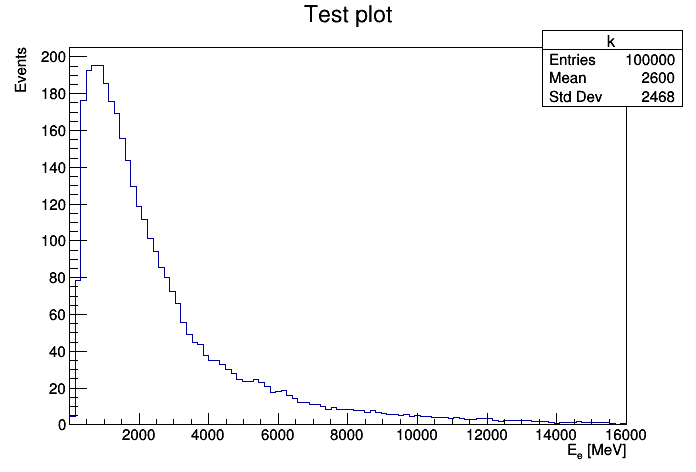

In [26]:
c.Draw()

## Histogram for the variable $E_e \theta^2$

In [27]:
f_scale = 1.0e-3 # In order to go from MeV to GeV
c=TCanvas()  
#c.SetLogx()
hist=TH1F("k", "preliminary plot",10000,1e-5,10)  
for i in range(Number): 
    Entry = File.GetEntry(i)
    EntryFromBranch = 1# File.GetLeaf("out").Entries()
    for j in range(EntryFromBranch):
        e1 = File.GetLeaf("out.t").GetValue(0)*f_scale #energy of outgoing electron
        px = File.GetLeaf("out.x").GetValue(0)*f_scale # px of outgoing electron
        py = File.GetLeaf("out.y").GetValue(0)*f_scale # py of outgoing electron
        pz = File.GetLeaf("out.z").GetValue(0)*f_scale # pz of outgoing electron
        m_e = File.GetLeaf("out._mass").GetValue(0)*f_scale # mass of outgoing electron
        hist.Fill(cut(px,py,pz,e1,m_e)[1])
        #if cut(px, py, pz, e1, m_e)[0]==True:
        #    hist.Fill(cut(px,py,pz,e1,m_e)[1])
        #    print "ok"
        #else:
        #    print "Something went wrong"


Warning in <TFile::Append>: Replacing existing TH1: k (Potential memory leak).


In [29]:
x=[]
Number = File.GetEntries() 
for i in xrange(Number):
    w1=File.GetEvent(i)
    x.append(w1)

In [30]:
#x

In [31]:
# Total number of events?
Entries=1.0*File.GetEntries() 
N_evts = sum(x)/(Entries)
print ("Total number of events: ", N_evts ) # warning, events/ton/year

('Total number of events: ', 3493.27376)


### Careful with the interpretation 

Number of events per bin 1 MeV and the verticle red line is around 2$m_e$, please compare with CCEQ Machado

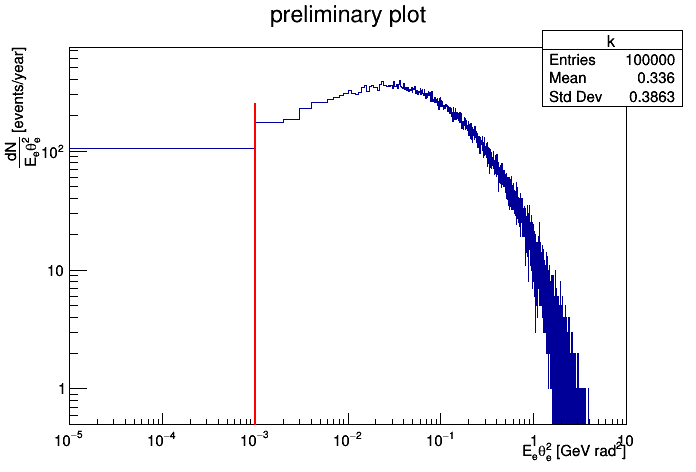

In [32]:
hist.SetXTitle("E_{e}#theta_{e}^{2} [GeV rad^{2}]")
#hist.SetYTitle("Events")
hist.SetYTitle("#frac{dN}{E_{e}#theta_{e}^{2}} [events/year]")
#hist.SetFillColor(38)
hist.SetBins(10000,1e-5,10)
#hist.SetBinsLength()
l=TLine(1e-3,0,1e-3,250.09)
l.SetLineColor(2)
l.SetLineWidth(2)
c.SetLogx()
c.SetLogy()
#c.SetFillColor(38)
#hist.SetNormFactor(N_evts)  #Normalizing to the total number of events
hist.Draw() 
c.Draw("SAME")
l.Draw()

## Listing all the branches inside the Tree

In [29]:
Tree=File
for b in Tree.GetListOfBranches():
    for w in b.GetListOfBranches():
        print w.GetName()

TObject
flag
par
in
temp
out
post
all
weight
norm
r
density
dyn
nod[14]
pr
nr
r_distance
res_jacobian
res_angrew
res_nu
res_q
